In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [2]:
import numpy as np  # linear algebra
import pandas as pd  # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import (confusion_matrix, accuracy_score, f1_score, recall_score, 
                             precision_score, roc_curve, roc_auc_score)
from sklearn.feature_selection import SelectKBest, chi2
from IPython.core.interactiveshell import InteractiveShell

InteractiveShell.ast_node_interactivity = "all"
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

In [3]:
df = pd.read_csv("C:/Users/Amritanshu Bhardwaj/Downloads/data_cardiovascular_risk.csv")

# first glimpse at data
df.head(20)

# data shape
df.shape

# data types
df.dtypes

id  age  education sex is_smoking  cigsPerDay  BPMeds  prevalentStroke  \
0    0   64        2.0   F        YES         3.0     0.0                0   
1    1   36        4.0   M         NO         0.0     0.0                0   
2    2   46        1.0   F        YES        10.0     0.0                0   
3    3   50        1.0   M        YES        20.0     0.0                0   
4    4   64        1.0   F        YES        30.0     0.0                0   
5    5   61        3.0   F         NO         0.0     0.0                0   
6    6   61        1.0   M         NO         0.0     0.0                0   
7    7   36        4.0   M        YES        35.0     0.0                0   
8    8   41        2.0   F        YES        20.0     NaN                0   
9    9   55        2.0   F         NO         0.0     0.0                0   
10  10   61        1.0   F         NO         0.0     0.0                0   
11  11   53        2.0   F         NO         0.0     0.0                0   
12  12   43        2.0   F         NO         0.0     0.0                0   
13  13   44        1.0   M        YES        40.0     0.0                0   
14  14   58        3.0   F         NO         0.0     0.0                0   
15  15   51        1.0   M        YES        15.0     0.0                0   
16  16   50        1.0   F         NO         0.0     0.0                0   
17  17   44        3.0   F         NO         0.0     0.0                0   
18  18   56        3.0   F         NO         0.0     0.0                0   
19  19   42        1.0   M        YES        30.0     0.0                0   

    prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  heartRate  glucose  \
0              0         0    221.0  148.0   85.0    NaN       90.0     80.0   
1              1         0    212.0  168.0   98.0  29.77       72.0     75.0   
2              0         0    250.0  116.0   71.0  20.35       88.0     94.0   
3              1         0    233.0  158.0   88.0  28.26       68.0     94.0   
4              0         0    241.0  136.5   85.0  26.42       70.0     77.0   
5              1         0    272.0  182.0  121.0  32.80       85.0     65.0   
6              1         0    238.0  232.0  136.0  24.83       75.0     79.0   
7              0         0    295.0  102.0   68.0  28.15       60.0     63.0   
8              0         0    220.0  126.0   78.0  20.70       86.0     79.0   
9              1         0    326.0  144.0   81.0  25.71       85.0      NaN   
10             1         0      NaN  185.0  121.0  35.22       80.0      NaN   
11             0         0    210.0  138.0   86.5  22.49       88.0     87.0   
12             0         0    213.0   96.0   62.0  19.38       74.0     80.0   
13             0         0    227.0  146.5   97.0  26.92       80.0     67.0   
14             1         0    188.0  160.0  120.0  35.58       88.0     85.0   
15             0         0    212.0  146.0   89.0  24.49      100.0    132.0   
16             1         0    240.0  163.0  105.0  31.37       89.0     75.0   
17             0         0    257.0  129.0   93.0  27.56       75.0     76.0   
18             0         0    267.0  122.5   85.0  24.22       92.0    100.0   
19             0         0    232.0  130.0   91.0  25.77       72.0     70.0   

    TenYearCHD  
0            1  
1            0  
2            0  
3            1  
4            0  
5            1  
6            0  
7            0  
8            0  
9            0  
10           0  
11           0  
12           0  
13           0  
14           0  
15           1  
16           0  
17           0  
18           0  
19           0

(3390, 17)

id                   int64
age                  int64
education          float64
sex                 object
is_smoking          object
cigsPerDay         float64
BPMeds             float64
prevalentStroke      int64
prevalentHyp         int64
diabetes             int64
totChol            float64
sysBP              float64
diaBP              float64
BMI                float64
heartRate          float64
glucose            float64
TenYearCHD           int64
dtype: object

In [4]:
duplicate_df = df[df.duplicated()]
duplicate_df

Empty DataFrame
Columns: [id, age, education, sex, is_smoking, cigsPerDay, BPMeds, prevalentStroke, prevalentHyp, diabetes, totChol, sysBP, diaBP, BMI, heartRate, glucose, TenYearCHD]
Index: []

In [5]:
df.isna().sum()
null = df[df.isna().any(axis=1)]
null

id                   0
age                  0
education           87
sex                  0
is_smoking           0
cigsPerDay          22
BPMeds              44
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             38
sysBP                0
diaBP                0
BMI                 14
heartRate            1
glucose            304
TenYearCHD           0
dtype: int64

id  age  education sex is_smoking  cigsPerDay  BPMeds  \
0        0   64        2.0   F        YES         3.0     0.0   
8        8   41        2.0   F        YES        20.0     NaN   
9        9   55        2.0   F         NO         0.0     0.0   
10      10   61        1.0   F         NO         0.0     0.0   
36      36   46        3.0   F         NO         0.0     0.0   
...    ...  ...        ...  ..        ...         ...     ...   
3349  3349   46        2.0   F         NO         0.0     0.0   
3370  3370   46        1.0   F        YES        30.0     0.0   
3378  3378   39        3.0   F        YES         NaN     0.0   
3379  3379   39        1.0   M        YES        30.0     0.0   
3388  3388   60        1.0   M         NO         0.0     NaN   

      prevalentStroke  prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  \
0                   0             0         0    221.0  148.0   85.0    NaN   
8                   0             0         0    220.0  126.0   78.0  20.70   
9                   0             1         0    326.0  144.0   81.0  25.71   
10                  0             1         0      NaN  185.0  121.0  35.22   
36                  0             0         0    193.0  106.5   70.5  26.18   
...               ...           ...       ...      ...    ...    ...    ...   
3349                0             0         0    242.0  129.0   85.0  27.40   
3370                0             0         0    219.0  107.0   69.0  21.40   
3378                0             0         0    197.0  126.5   76.5  19.71   
3379                0             0         0    292.0  120.0   85.0  31.09   
3388                0             1         0    191.0  167.0  105.0  23.01   

      heartRate  glucose  TenYearCHD  
0          90.0     80.0           1  
8          86.0     79.0           0  
9          85.0      NaN           0  
10         80.0      NaN           0  
36         75.0      NaN           0  
...         ...      ...         ...  
3349       80.0      NaN           1  
3370       66.0      NaN           0  
3378       55.0     63.0           0  
3379       85.0      NaN           0  
3388       80.0     85.0           0  

[463 rows x 17 columns]

C:\Users\Amritanshu Bhardwaj\AppData\Local\Temp\ipykernel_13884\1052702999.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  df.hist(ax=ax)


array([[<Axes: title={'center': 'id'}>, <Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'education'}>,
        <Axes: title={'center': 'cigsPerDay'}>],
       [<Axes: title={'center': 'BPMeds'}>,
        <Axes: title={'center': 'prevalentStroke'}>,
        <Axes: title={'center': 'prevalentHyp'}>,
        <Axes: title={'center': 'diabetes'}>],
       [<Axes: title={'center': 'totChol'}>,
        <Axes: title={'center': 'sysBP'}>,
        <Axes: title={'center': 'diaBP'}>,
        <Axes: title={'center': 'BMI'}>],
       [<Axes: title={'center': 'heartRate'}>,
        <Axes: title={'center': 'glucose'}>,
        <Axes: title={'center': 'TenYearCHD'}>, <Axes: >]], dtype=object)

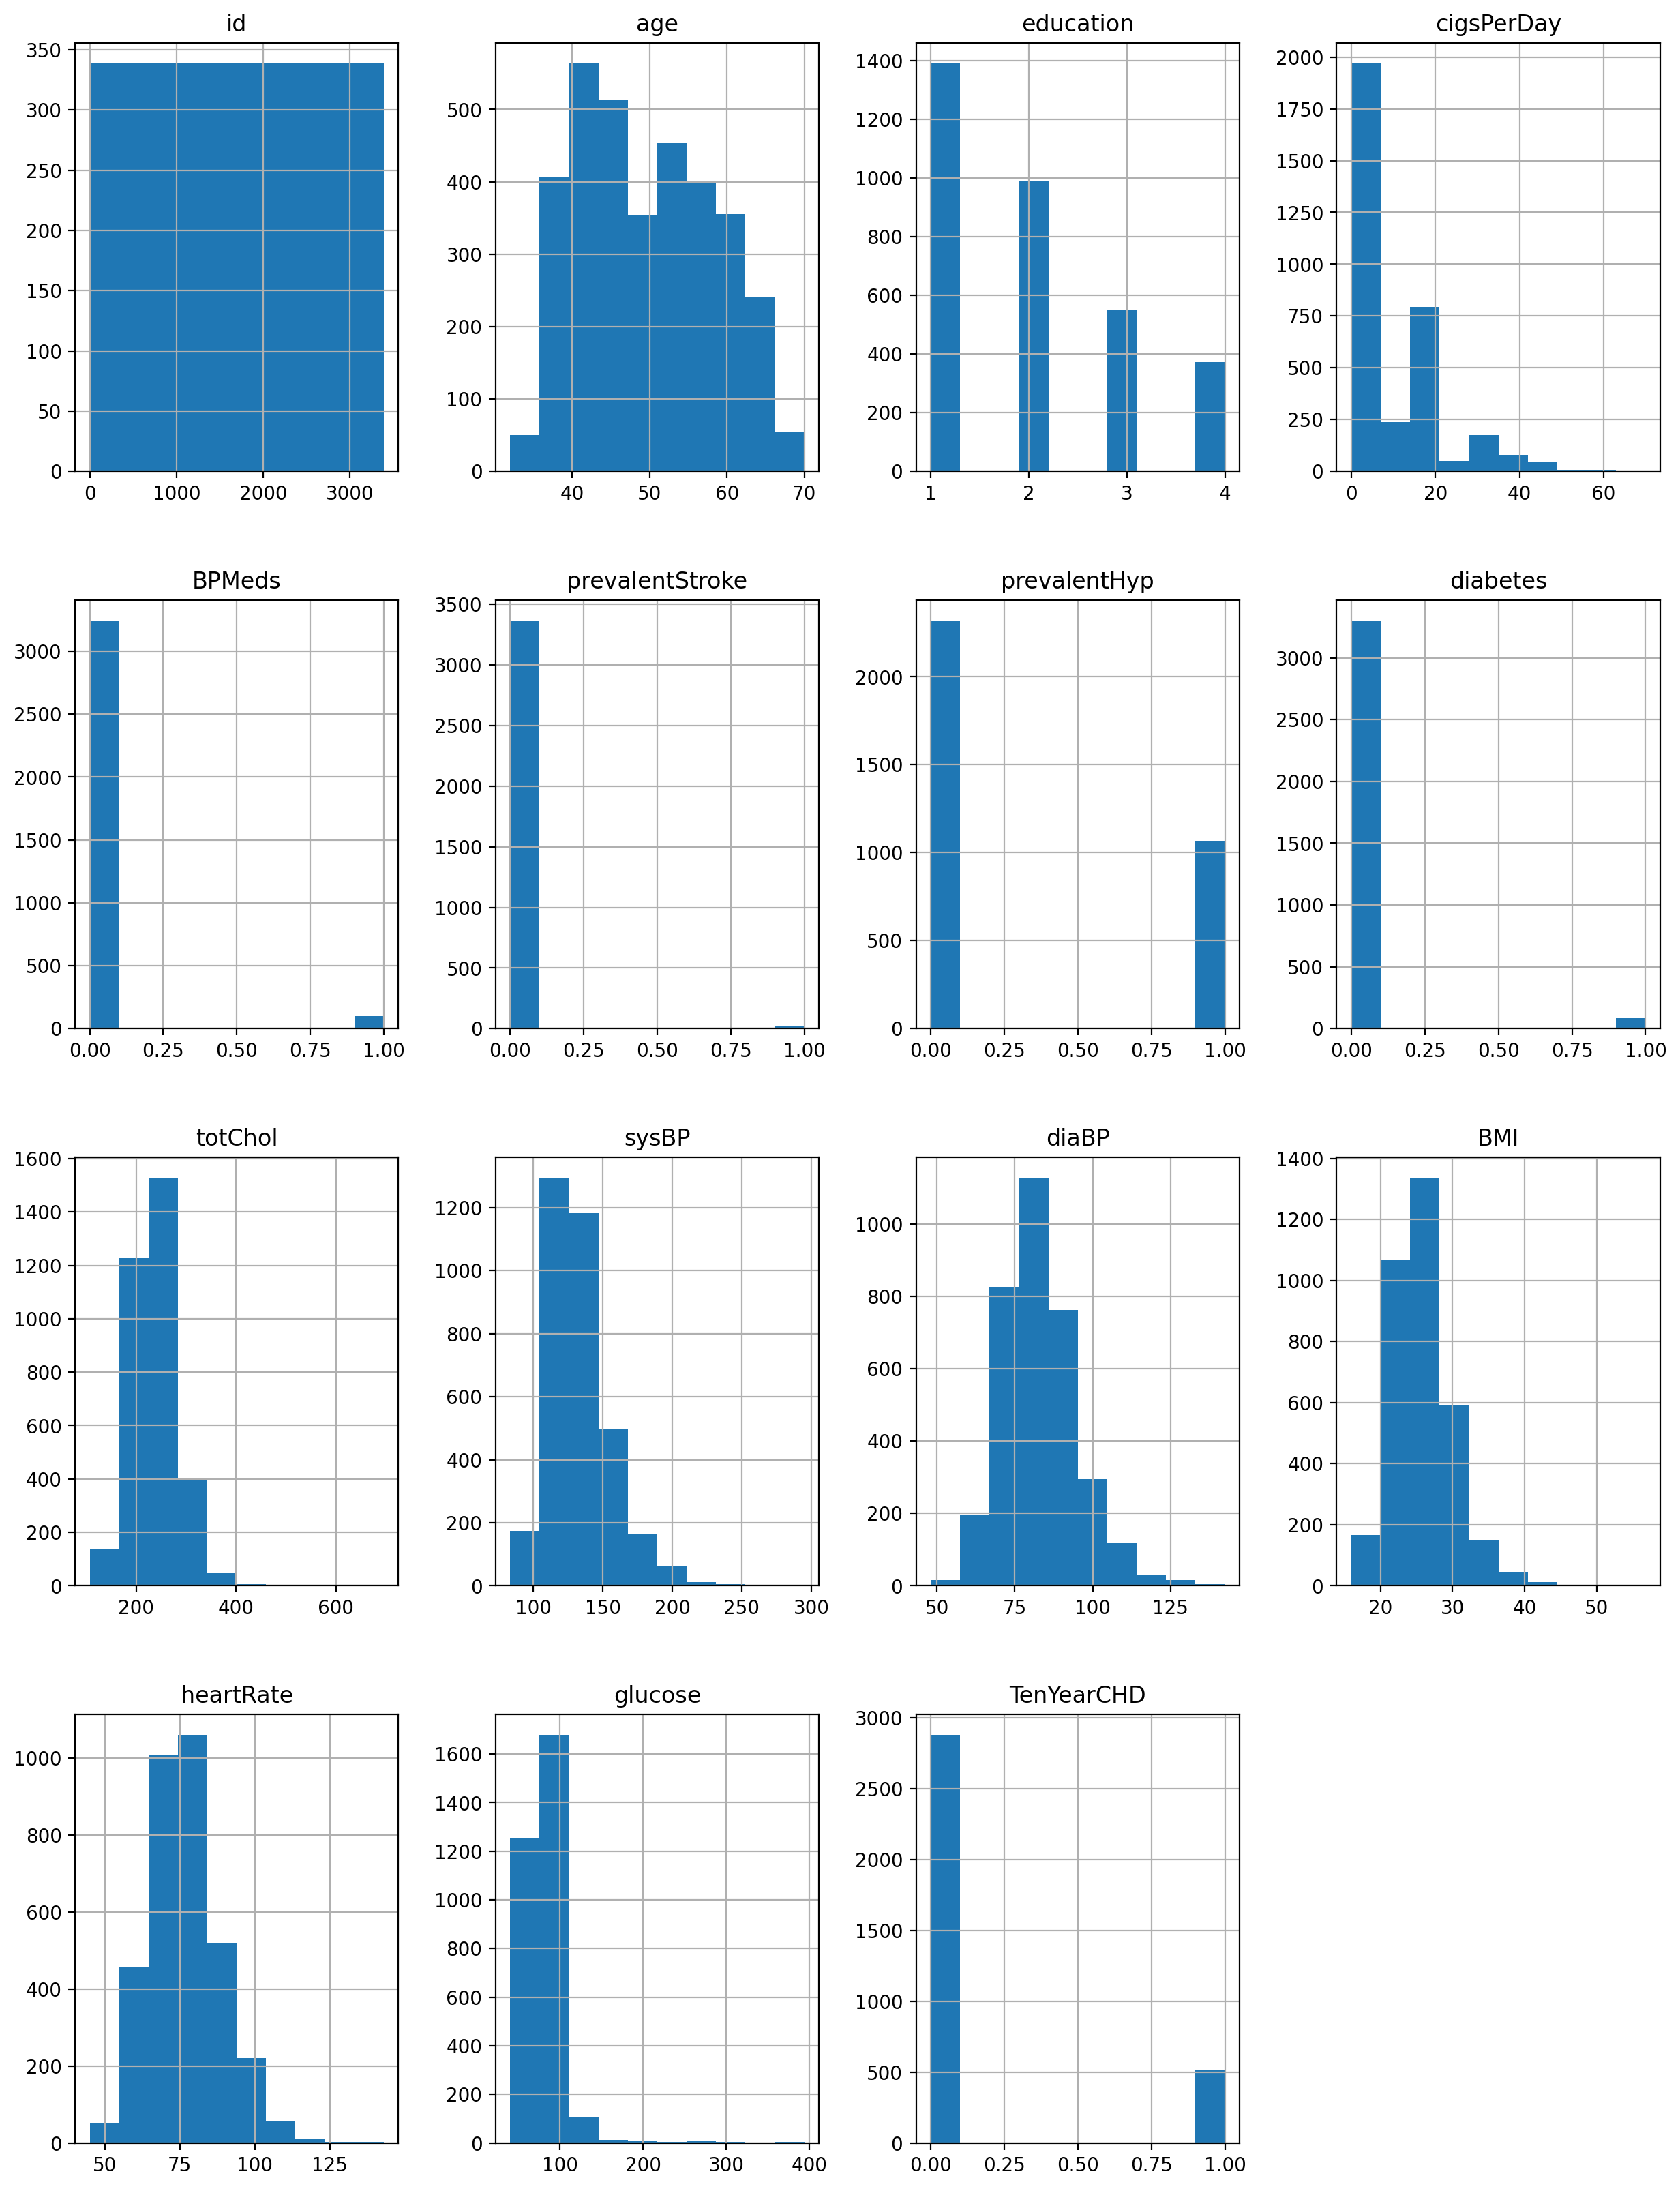

In [6]:
fig = plt.figure(figsize=(15, 20))
ax = fig.gca()
df.hist(ax=ax)
plt.show()

Non-numeric columns: Index(['sex', 'is_smoking'], dtype='object')


<Figure size 1200x1000 with 0 Axes>

<Axes: >

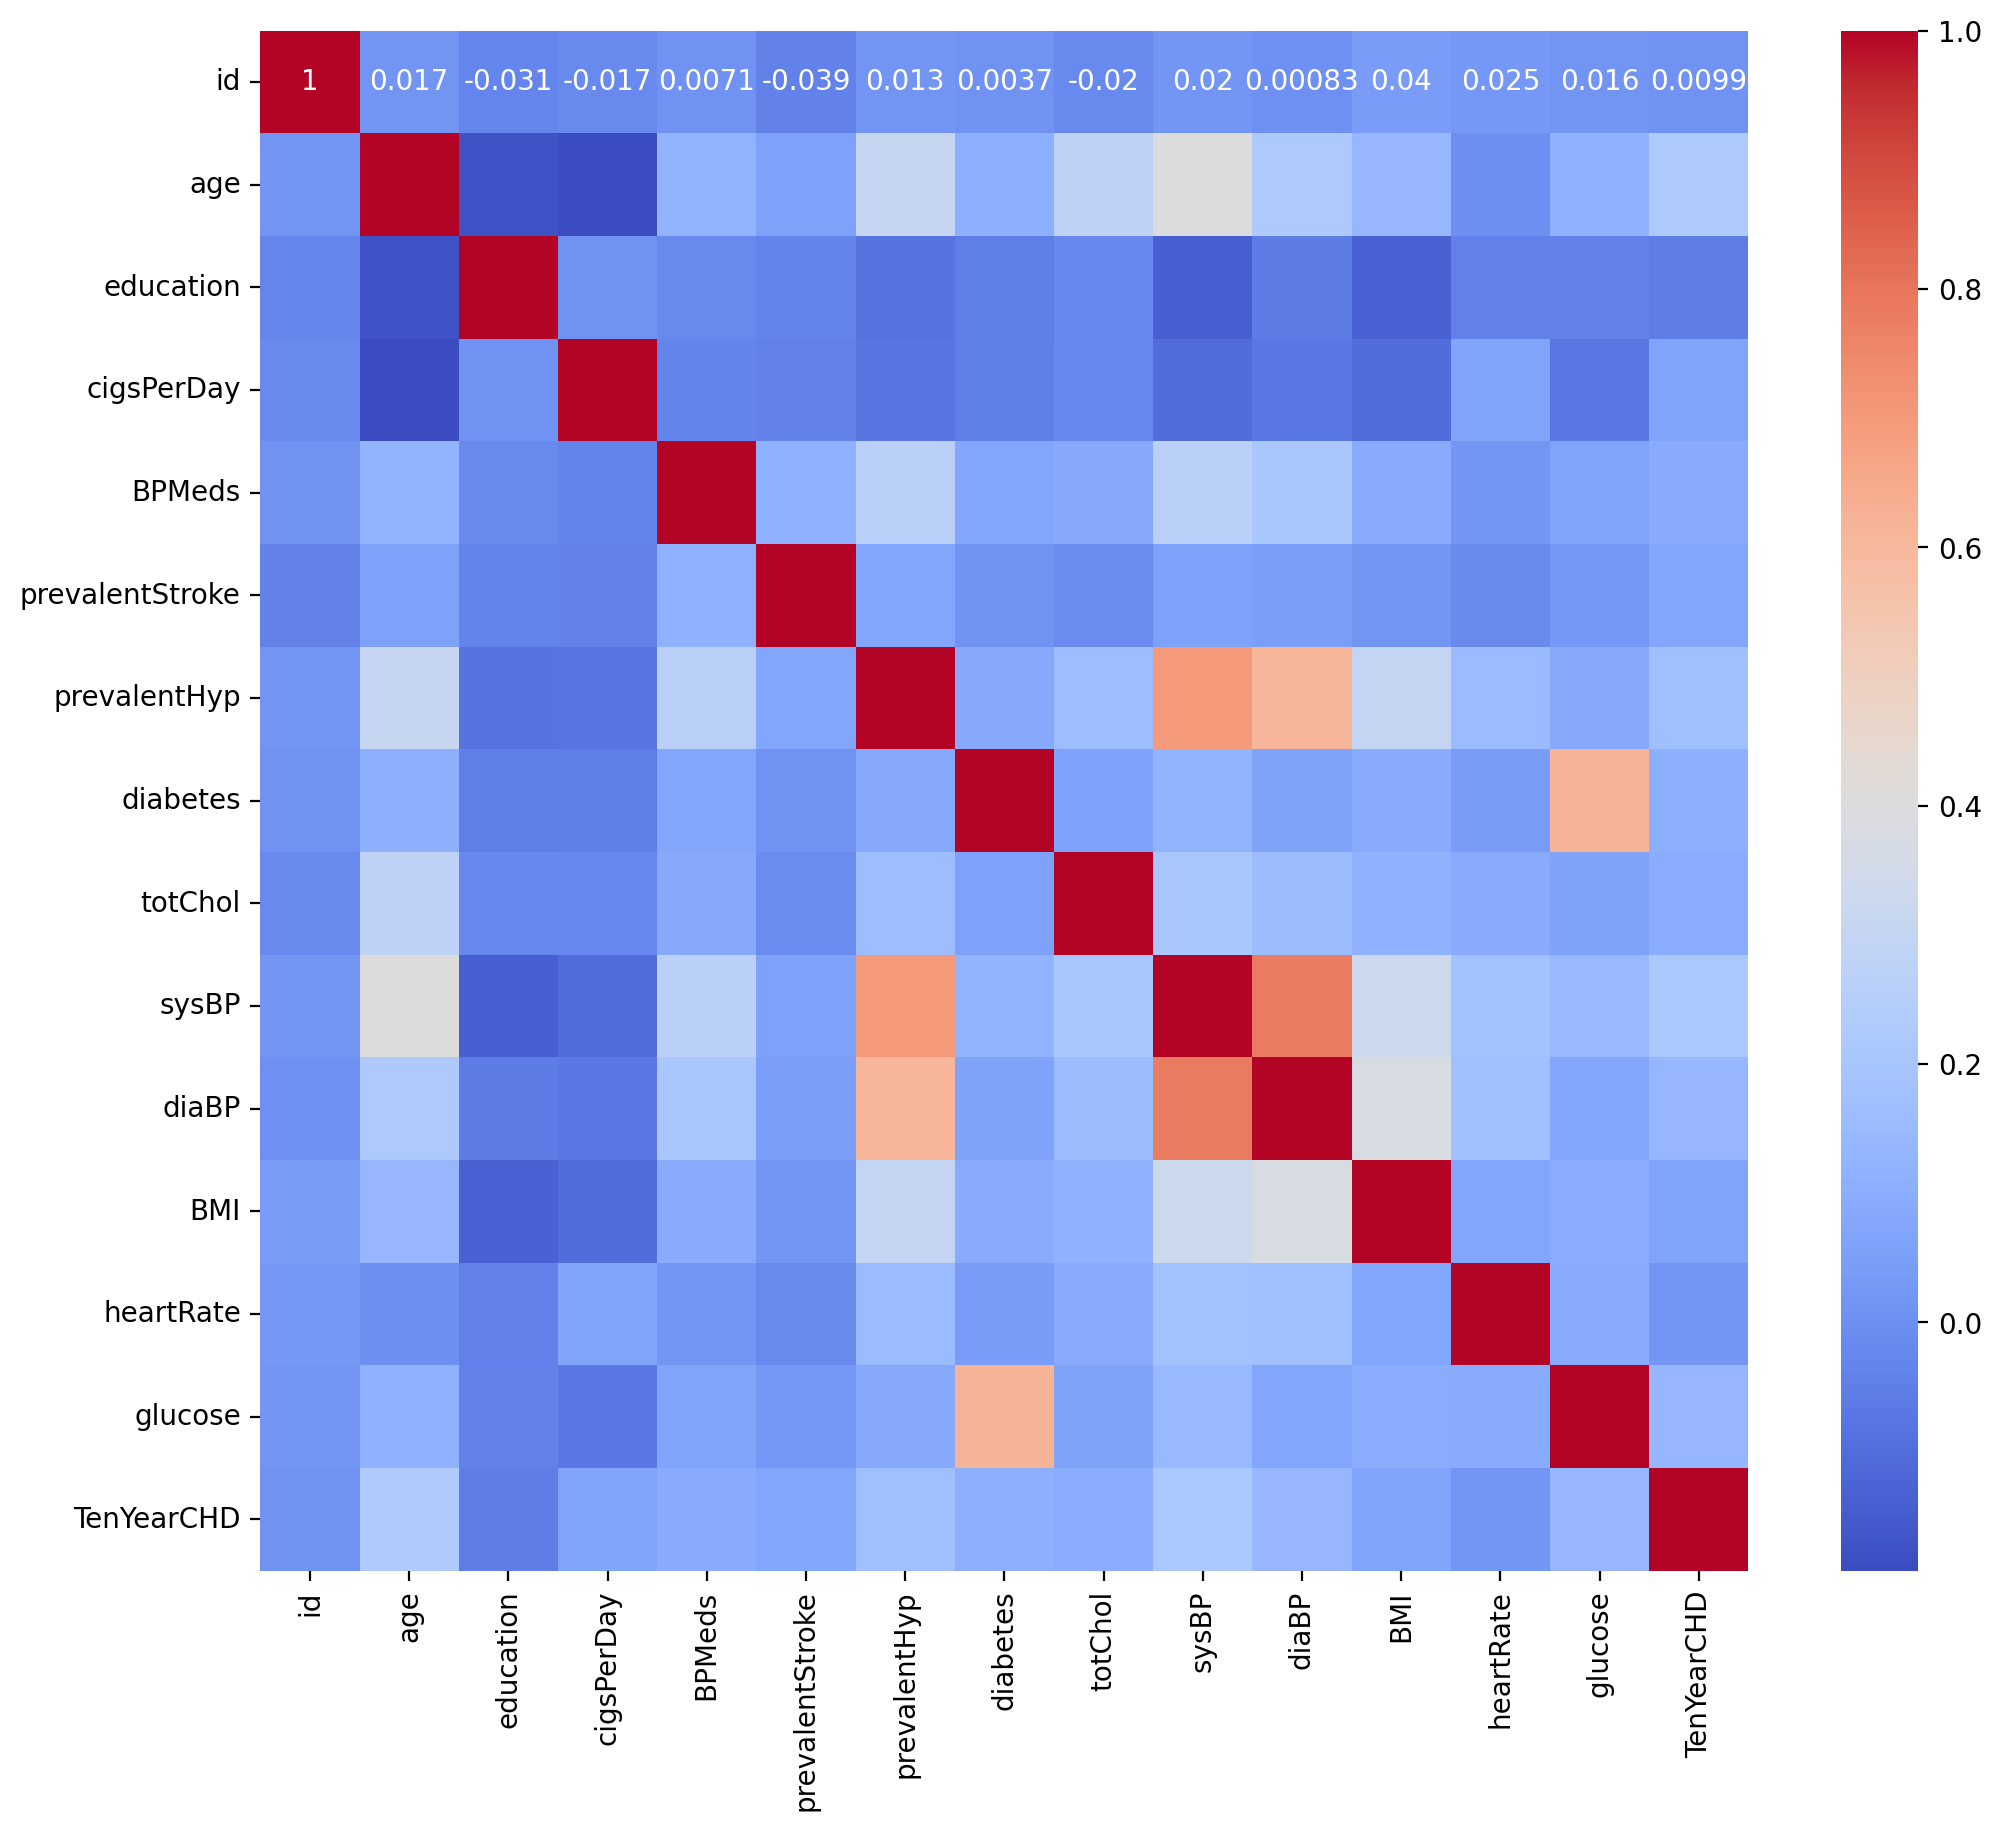

In [7]:
non_numeric_cols = df.select_dtypes(include=['object', 'category']).columns
print("Non-numeric columns:", non_numeric_cols)
df_numeric = df.drop(columns=non_numeric_cols)
df_corr = df_numeric.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(df_corr, annot=True, cmap='coolwarm')
plt.show()


In [8]:
df.isna().sum()

id                   0
age                  0
education           87
sex                  0
is_smoking           0
cigsPerDay          22
BPMeds              44
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             38
sysBP                0
diaBP                0
BMI                 14
heartRate            1
glucose            304
TenYearCHD           0
dtype: int64

In [9]:
df = df.dropna()
df.isna().sum()
df.columns

id                 0
age                0
education          0
sex                0
is_smoking         0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

Index(['id', 'age', 'education', 'sex', 'is_smoking', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

In [10]:
# Identify the features with the most importance for the outcome variable Heart Disease

import pandas as pd
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.preprocessing import LabelEncoder

# Convert categorical variables to numeric using LabelEncoder
df_encoded = df.apply(lambda col: LabelEncoder().fit_transform(col) if col.dtype == 'object' else col)

# Separate independent & dependent variables
X = df_encoded.iloc[:, 0:14]  # independent columns
y = df_encoded.iloc[:, -1]    # target column i.e. price range

# Apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X, y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

# Concatenate two dataframes for better visualization 
featureScores = pd.concat([dfcolumns, dfscores], axis=1)
featureScores.columns = ['Specs', 'Score']  # naming the dataframe columns
print(featureScores.nlargest(10, 'Score'))


           Specs       Score
11         sysBP  519.840881
10       totChol  278.418281
1            age  240.058688
0             id  199.686999
5     cigsPerDay  162.115268
12         diaBP   99.495351
8   prevalentHyp   57.413962
9       diabetes   28.483542
6         BPMeds   24.484602
13           BMI   11.161921


In [11]:
featureScores = featureScores.sort_values(by='Score', ascending=False)
featureScores

Specs       Score
11            sysBP  519.840881
10          totChol  278.418281
1               age  240.058688
0                id  199.686999
5        cigsPerDay  162.115268
12            diaBP   99.495351
8      prevalentHyp   57.413962
9          diabetes   28.483542
6            BPMeds   24.484602
13              BMI   11.161921
3               sex   10.861065
7   prevalentStroke    7.870084
2         education    6.005817
4        is_smoking    1.645271

<Figure size 2000x500 with 0 Axes>

<Axes: xlabel='Specs', ylabel='Score'>

Text(0.5, 1.0, 'Feature importance')

Text(0.5, 0, 'Features')

Text(0, 0.5, 'Importance')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 [Text(0, 0, 'sysBP'),
  Text(1, 0, 'totChol'),
  Text(2, 0, 'age'),
  Text(3, 0, 'id'),
  Text(4, 0, 'cigsPerDay'),
  Text(5, 0, 'diaBP'),
  Text(6, 0, 'prevalentHyp'),
  Text(7, 0, 'diabetes'),
  Text(8, 0, 'BPMeds'),
  Text(9, 0, 'BMI'),
  Text(10, 0, 'sex'),
  Text(11, 0, 'prevalentStroke'),
  Text(12, 0, 'education'),
  Text(13, 0, 'is_smoking')])

(array([  0., 100., 200., 300., 400., 500., 600.]),
 [Text(0, 0.0, '0'),
  Text(0, 100.0, '100'),
  Text(0, 200.0, '200'),
  Text(0, 300.0, '300'),
  Text(0, 400.0, '400'),
  Text(0, 500.0, '500'),
  Text(0, 600.0, '600')])

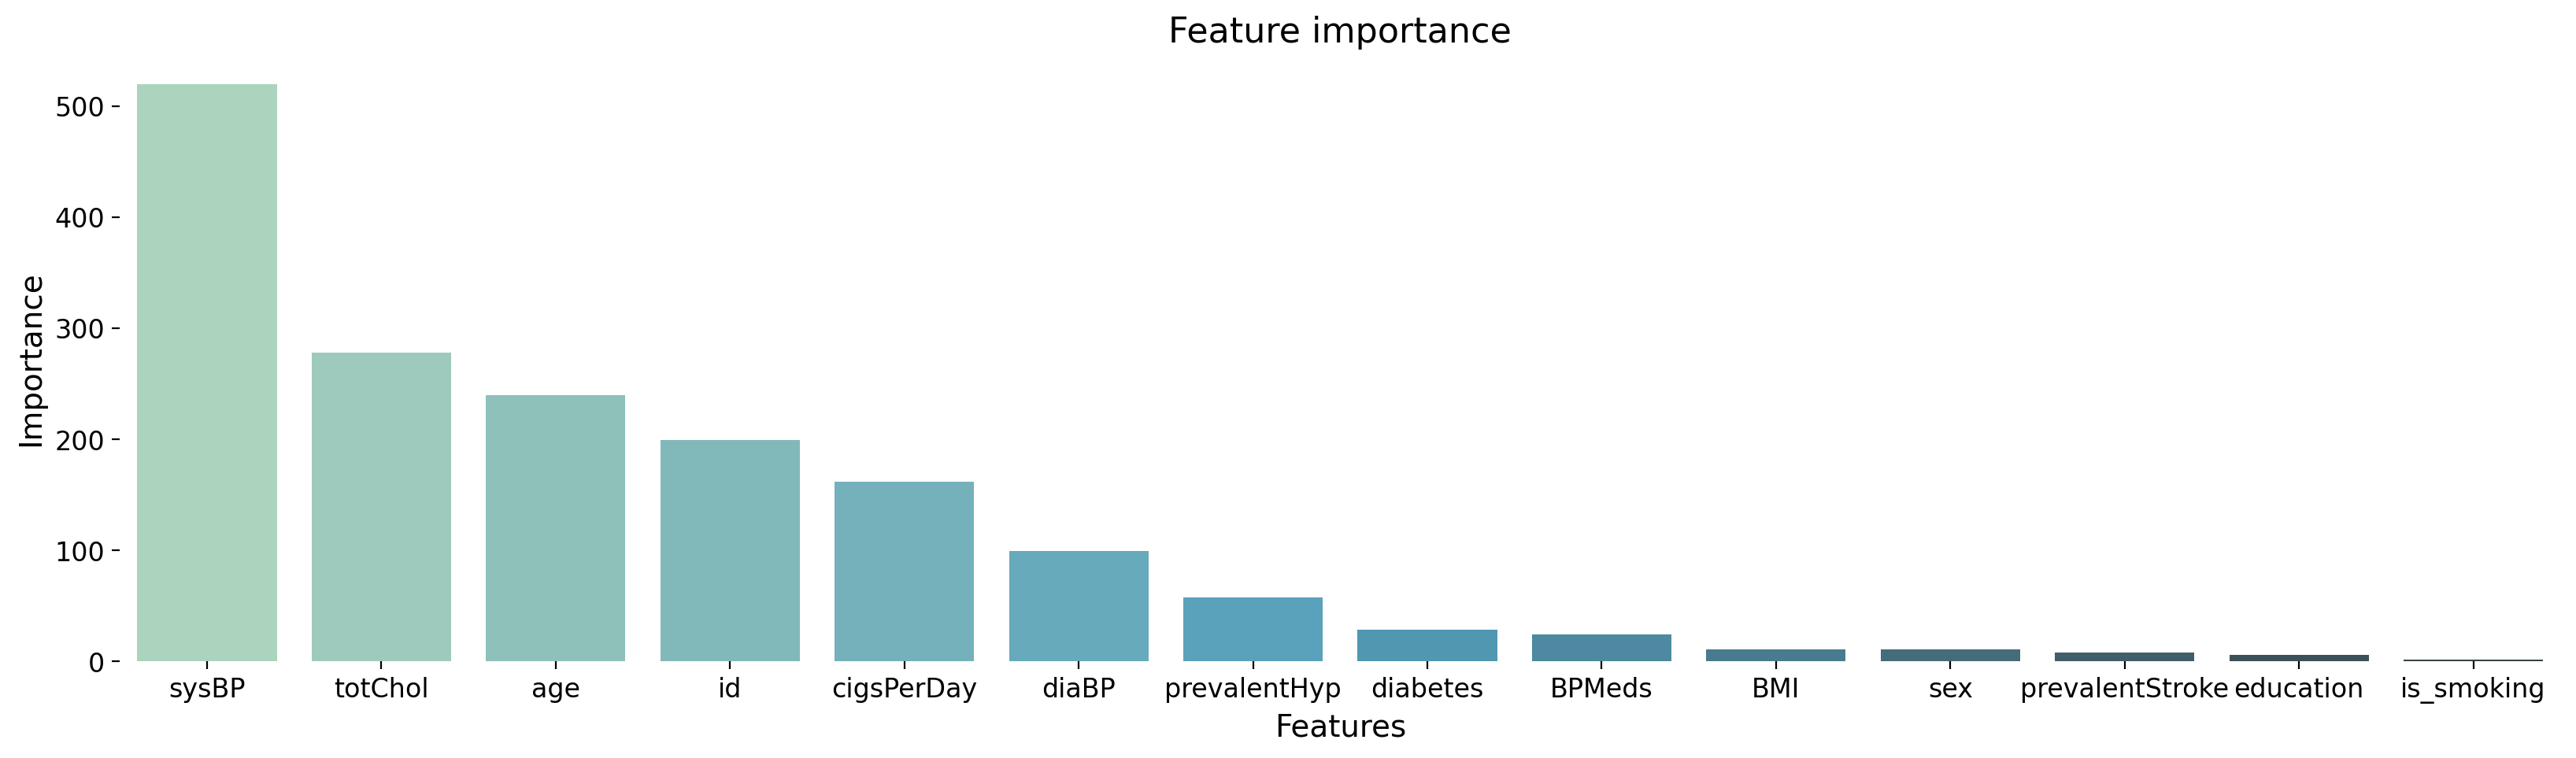

In [12]:
plt.figure(figsize=(20, 5))
sns.barplot(x='Specs', y='Score', data=featureScores, palette="GnBu_d")
plt.box(False)
plt.title('Feature importance', fontsize=16)
plt.xlabel('Features', fontsize=14)
plt.ylabel('Importance', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

In [13]:
# selecting the 10 most impactful features for the target variable
features_list = featureScores["Specs"].tolist()[:10]
features_list

['sysBP',
 'totChol',
 'age',
 'id',
 'cigsPerDay',
 'diaBP',
 'prevalentHyp',
 'diabetes',
 'BPMeds',
 'BMI']

In [14]:
# Create new dataframe with selected features

df = df[['sysBP','age','totChol','cigsPerDay','diaBP','prevalentHyp','diabetes','BPMeds','TenYearCHD']]
df.head()

sysBP  age  totChol  cigsPerDay  diaBP  prevalentHyp  diabetes  BPMeds  \
1  168.0   36    212.0         0.0   98.0             1         0     0.0   
2  116.0   46    250.0        10.0   71.0             0         0     0.0   
3  158.0   50    233.0        20.0   88.0             1         0     0.0   
4  136.5   64    241.0        30.0   85.0             0         0     0.0   
5  182.0   61    272.0         0.0  121.0             1         0     0.0   

   TenYearCHD  
1           0  
2           0  
3           1  
4           0  
5           1

<Axes: >

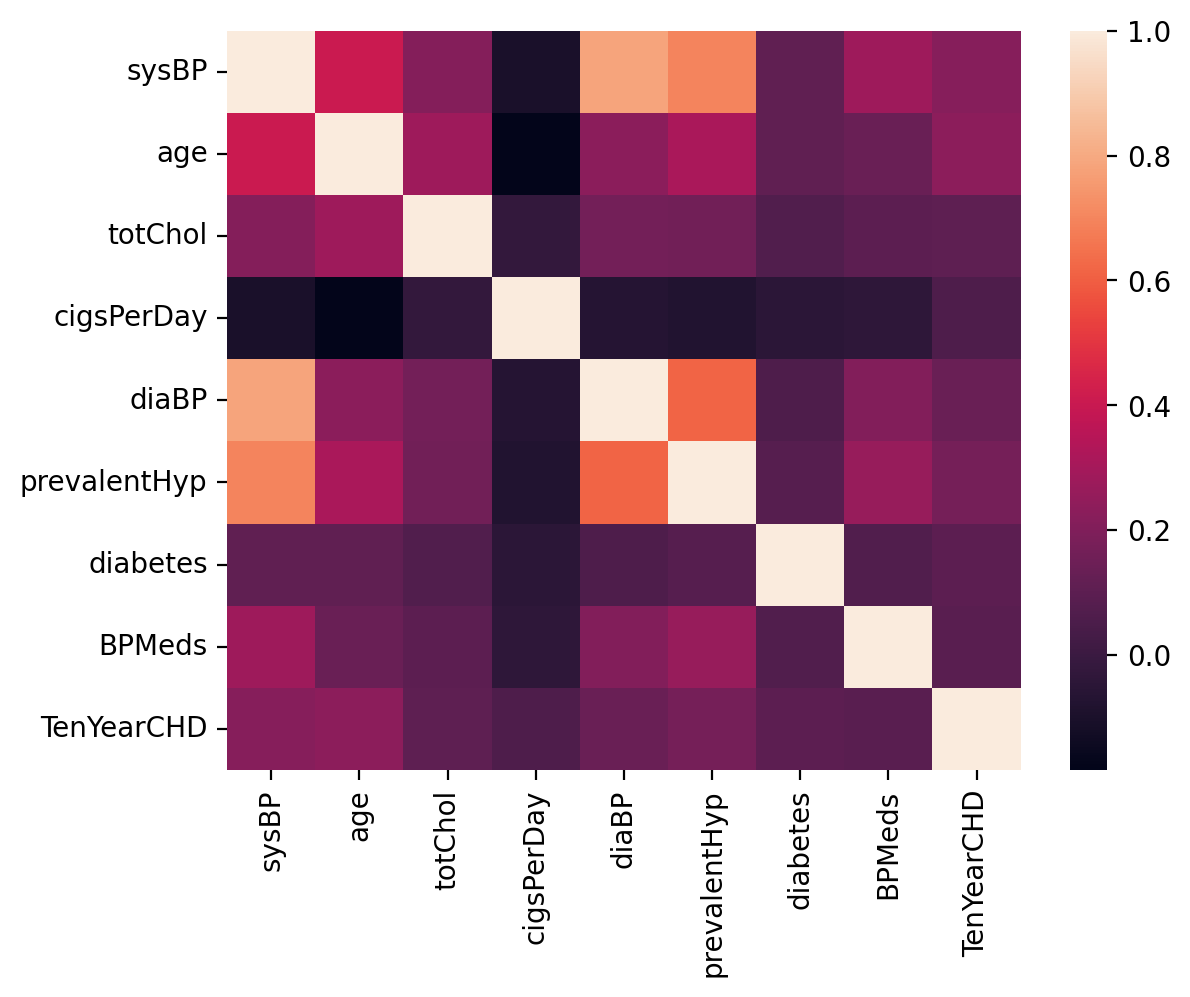

In [15]:
df_corr = df.corr()
sns.heatmap(df_corr)

sysBP          age      totChol   cigsPerDay        diaBP  \
count  2927.000000  2927.000000  2927.000000  2927.000000  2927.000000   
mean    132.626409    49.507345   237.129142     9.112743    82.906218   
std      22.326197     8.597191    44.613282    11.882784    12.078873   
min      83.500000    32.000000   113.000000     0.000000    48.000000   
25%     117.000000    42.000000   206.000000     0.000000    74.500000   
50%     128.500000    49.000000   234.000000     0.000000    82.000000   
75%     144.000000    56.000000   264.000000    20.000000    90.000000   
max     295.000000    70.000000   600.000000    70.000000   142.500000   

       prevalentHyp     diabetes       BPMeds   TenYearCHD  
count   2927.000000  2927.000000  2927.000000  2927.000000  
mean       0.314315     0.026990     0.030065     0.151691  
std        0.464322     0.162082     0.170795     0.358783  
min        0.000000     0.000000     0.000000     0.000000  
25%        0.000000     0.000000     0.000000     0.000000  
50%        0.000000     0.000000     0.000000     0.000000  
75%        1.000000     0.000000     0.000000     0.000000  
max        1.000000     1.000000     1.000000     1.000000

C:\Users\Amritanshu Bhardwaj\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Amritanshu Bhardwaj\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Amritanshu Bhardwaj\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Amritanshu Bhardwaj\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a fu

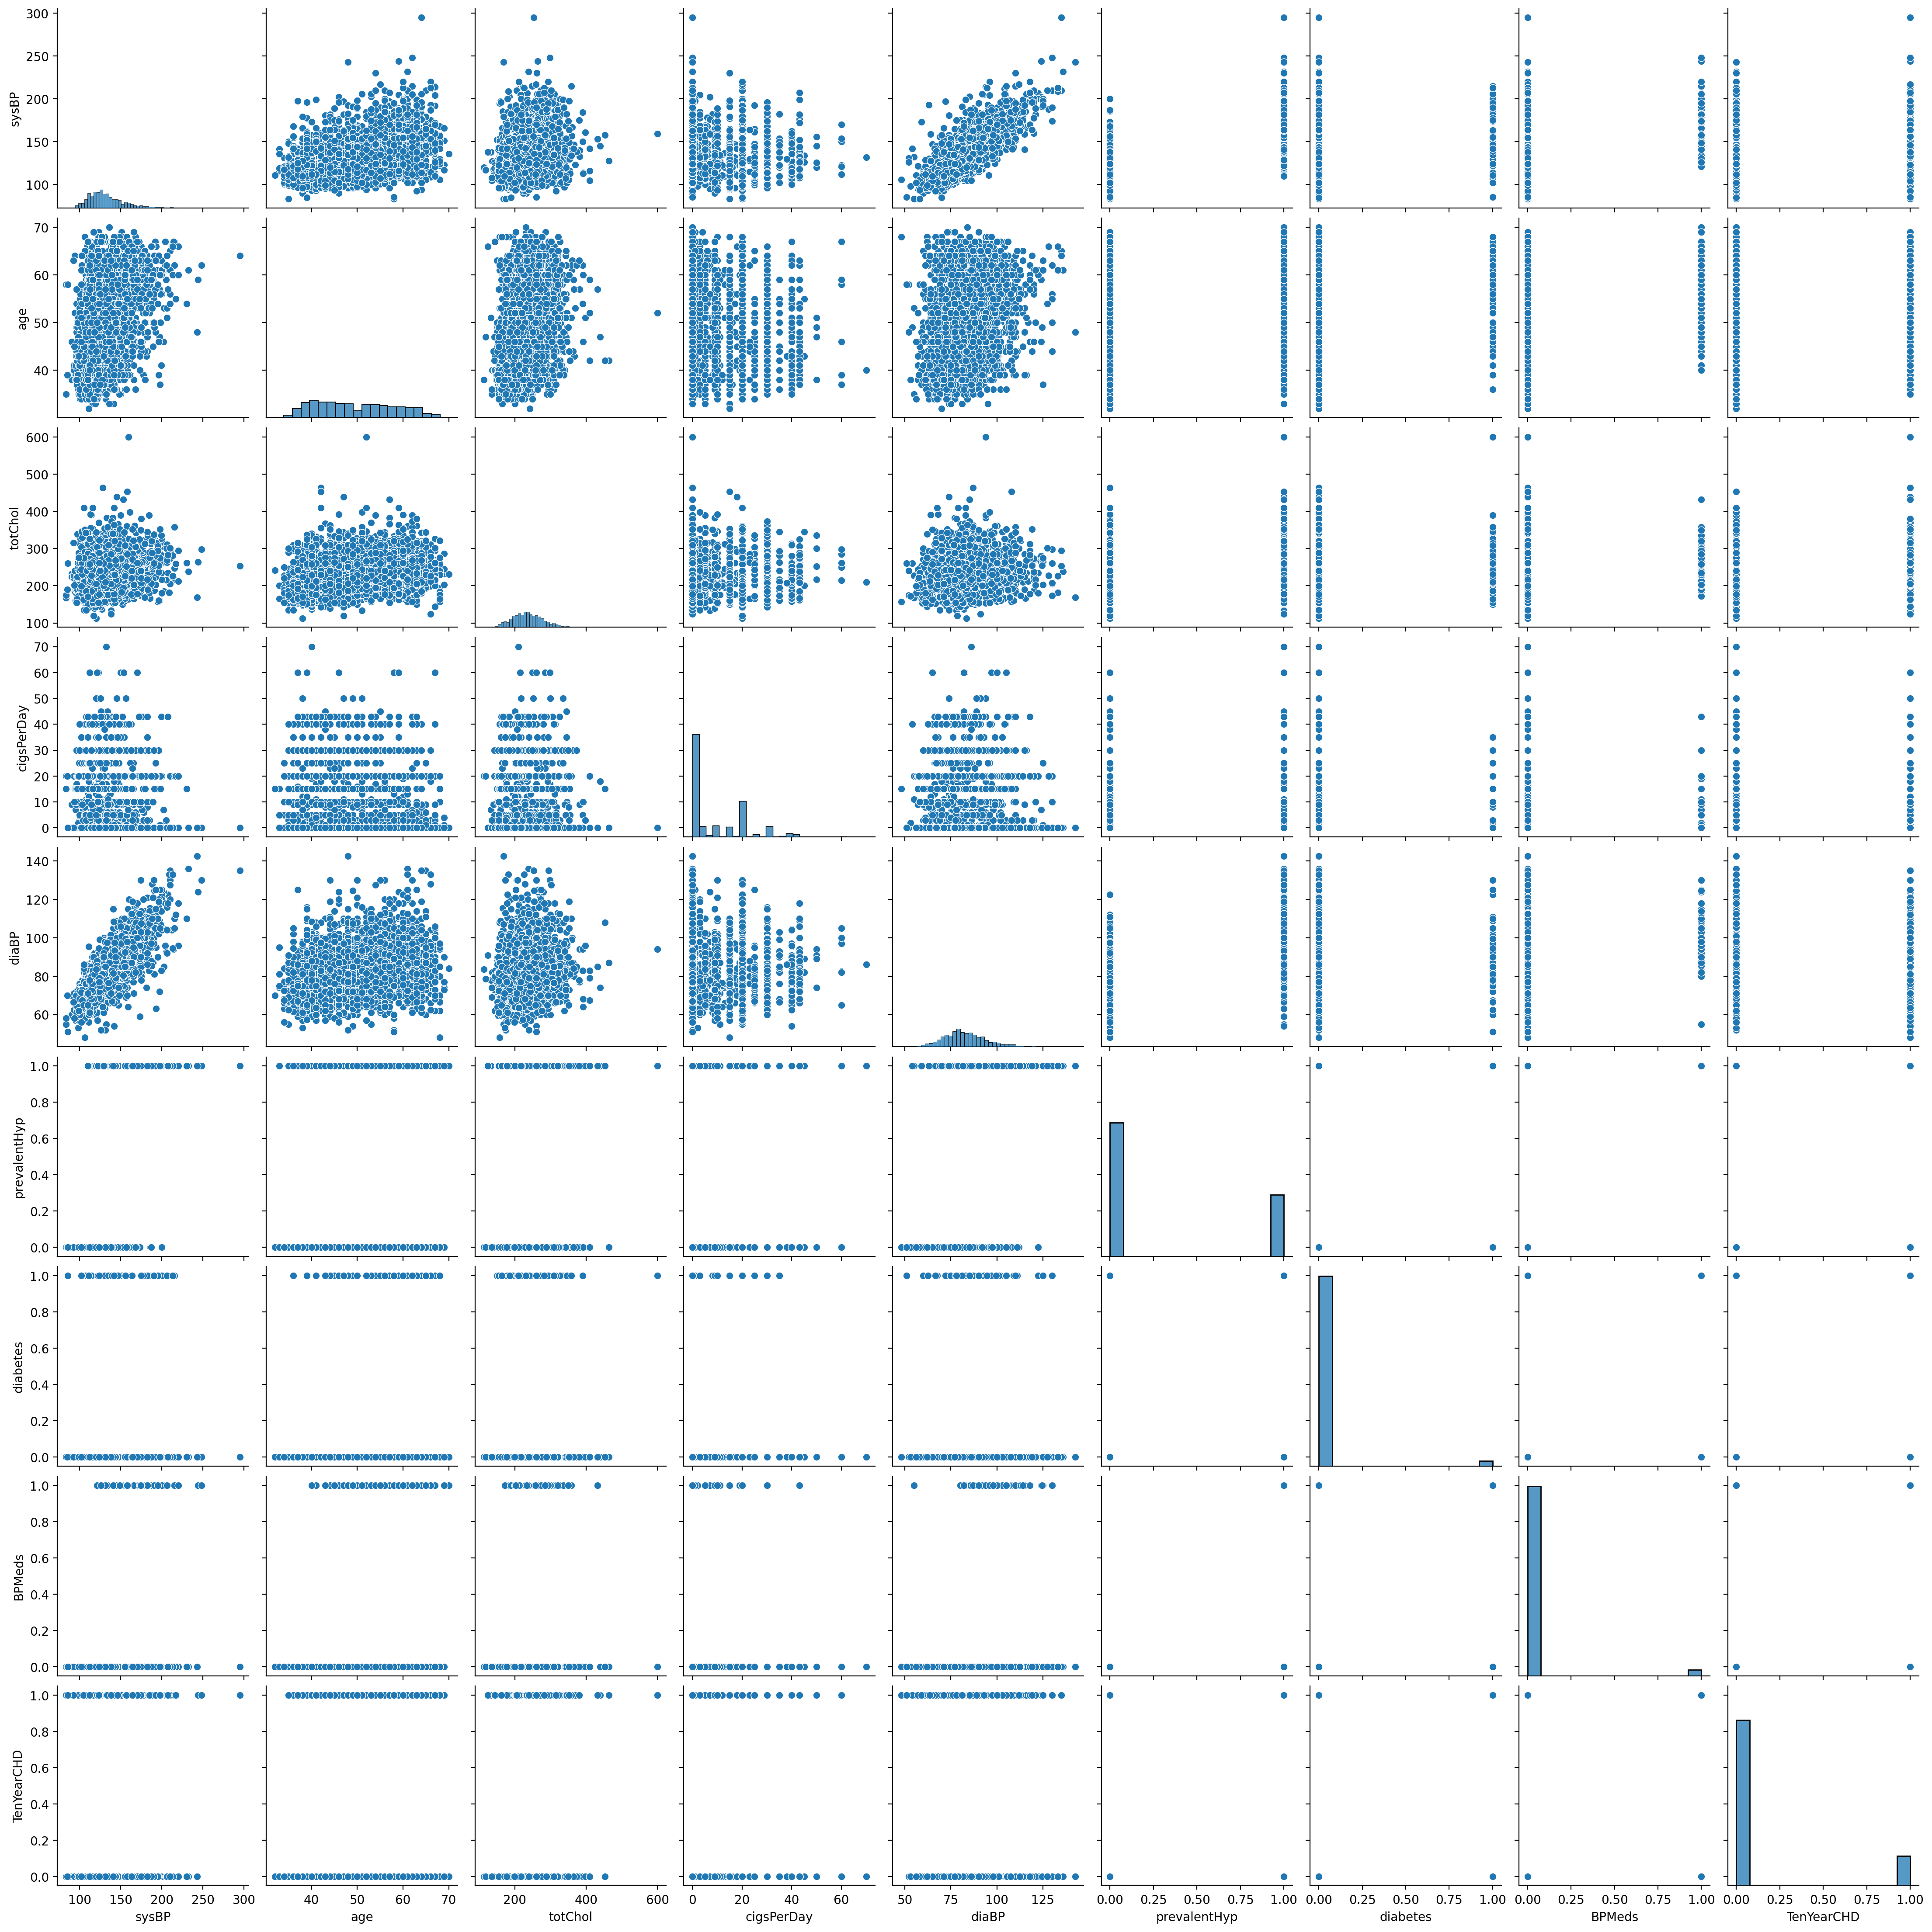

In [19]:
# Checking for outliers
df.describe()
sns.pairplot(df)

<Figure size 2000x1500 with 0 Axes>

<Axes: >

C:\Users\Amritanshu Bhardwaj\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='sysBP', ylabel='Count'>

Text(0.5, 1.0, 'Distribution of sysBP')

<Axes: >

C:\Users\Amritanshu Bhardwaj\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='totChol', ylabel='Count'>

Text(0.5, 1.0, 'Distribution of totChol')

<Axes: >

C:\Users\Amritanshu Bhardwaj\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='age', ylabel='Count'>

Text(0.5, 1.0, 'Distribution of age')

<Axes: >

C:\Users\Amritanshu Bhardwaj\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='cigsPerDay', ylabel='Count'>

Text(0.5, 1.0, 'Distribution of cigsPerDay')

<Axes: >

C:\Users\Amritanshu Bhardwaj\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='diaBP', ylabel='Count'>

Text(0.5, 1.0, 'Distribution of diaBP')

<Axes: >

C:\Users\Amritanshu Bhardwaj\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='prevalentHyp', ylabel='Count'>

Text(0.5, 1.0, 'Distribution of prevalentHyp')

<Axes: >

C:\Users\Amritanshu Bhardwaj\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='diabetes', ylabel='Count'>

Text(0.5, 1.0, 'Distribution of diabetes')

<Axes: >

C:\Users\Amritanshu Bhardwaj\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='BPMeds', ylabel='Count'>

Text(0.5, 1.0, 'Distribution of BPMeds')

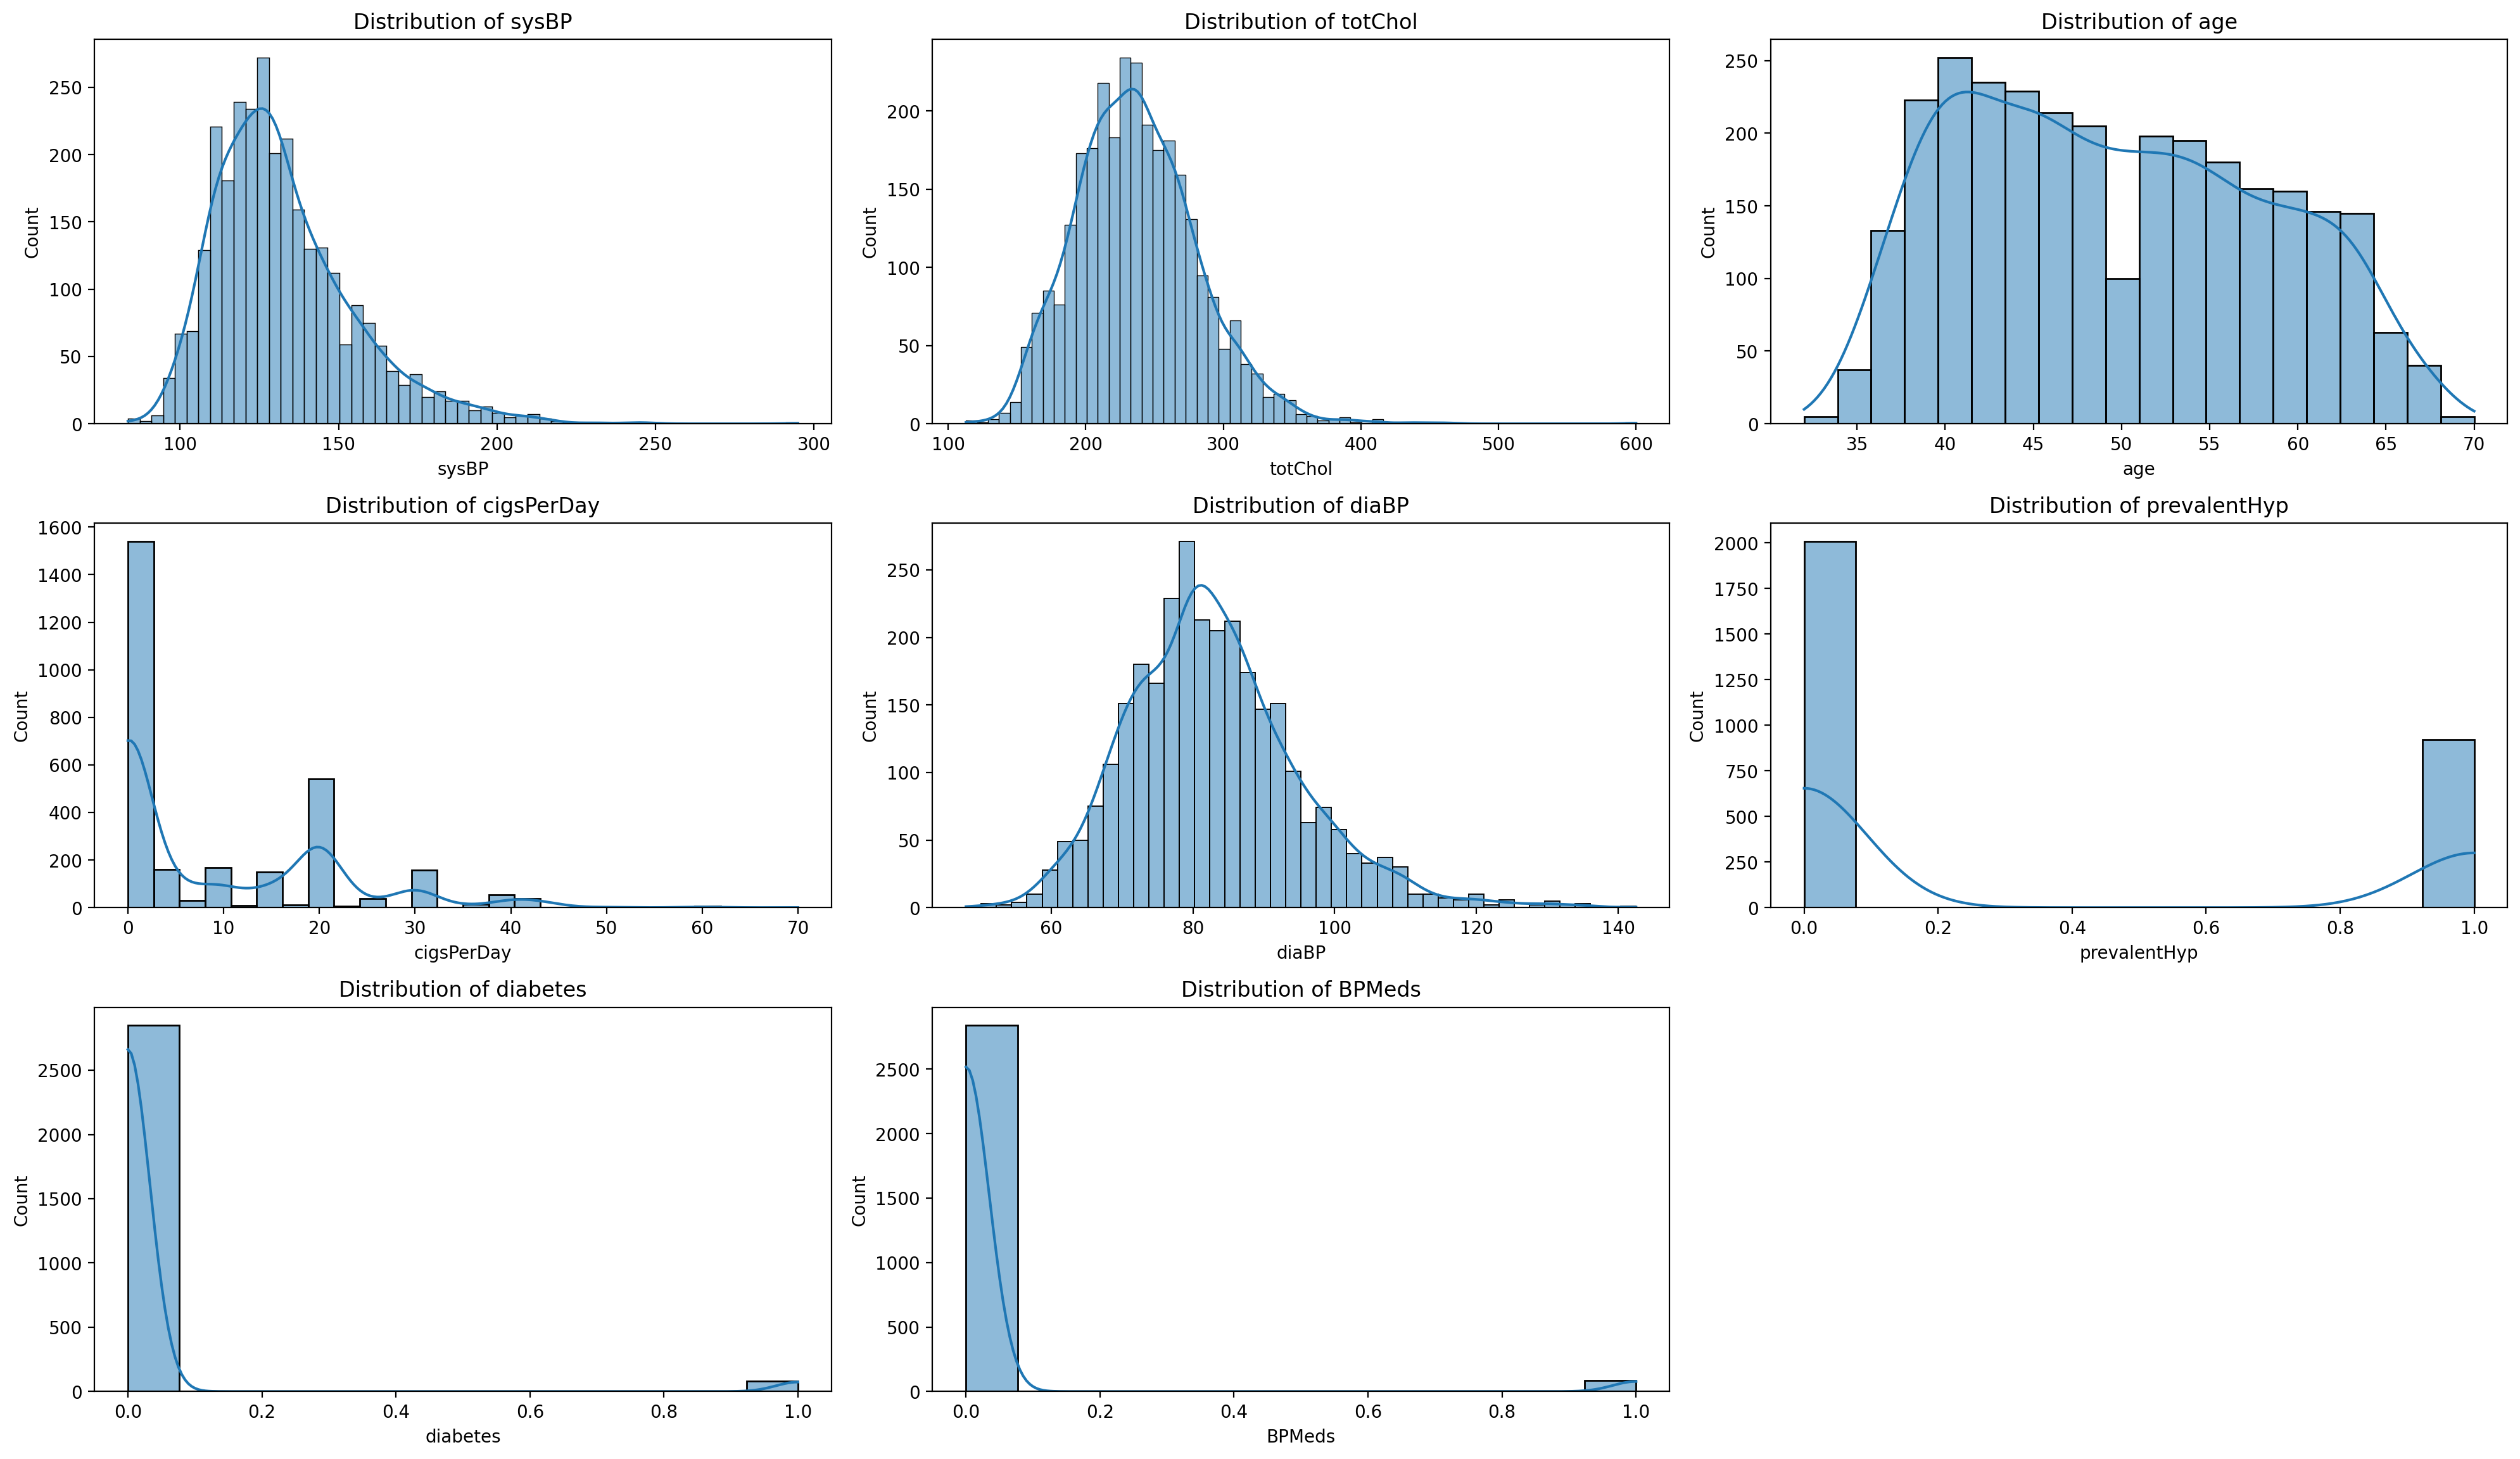

In [17]:
features_list = [feature for feature in features_list if feature in df.columns]

# Additional visualizations
# Distribution plots for selected features
plt.figure(figsize=(20, 15))
for i, feature in enumerate(features_list, 1):
    plt.subplot(4, 3, i)
    sns.histplot(df[feature], kde=True)
    plt.title(f'Distribution of {feature}')
plt.tight_layout()
plt.show()

<Figure size 2000x1500 with 0 Axes>

<Axes: >

<Axes: xlabel='TenYearCHD', ylabel='sysBP'>

Text(0.5, 1.0, 'Box plot of sysBP by TenYearCHD')

<Axes: >

<Axes: xlabel='TenYearCHD', ylabel='totChol'>

Text(0.5, 1.0, 'Box plot of totChol by TenYearCHD')

<Axes: >

<Axes: xlabel='TenYearCHD', ylabel='age'>

Text(0.5, 1.0, 'Box plot of age by TenYearCHD')

<Axes: >

<Axes: xlabel='TenYearCHD', ylabel='cigsPerDay'>

Text(0.5, 1.0, 'Box plot of cigsPerDay by TenYearCHD')

<Axes: >

<Axes: xlabel='TenYearCHD', ylabel='diaBP'>

Text(0.5, 1.0, 'Box plot of diaBP by TenYearCHD')

<Axes: >

<Axes: xlabel='TenYearCHD', ylabel='prevalentHyp'>

Text(0.5, 1.0, 'Box plot of prevalentHyp by TenYearCHD')

<Axes: >

<Axes: xlabel='TenYearCHD', ylabel='diabetes'>

Text(0.5, 1.0, 'Box plot of diabetes by TenYearCHD')

<Axes: >

<Axes: xlabel='TenYearCHD', ylabel='BPMeds'>

Text(0.5, 1.0, 'Box plot of BPMeds by TenYearCHD')

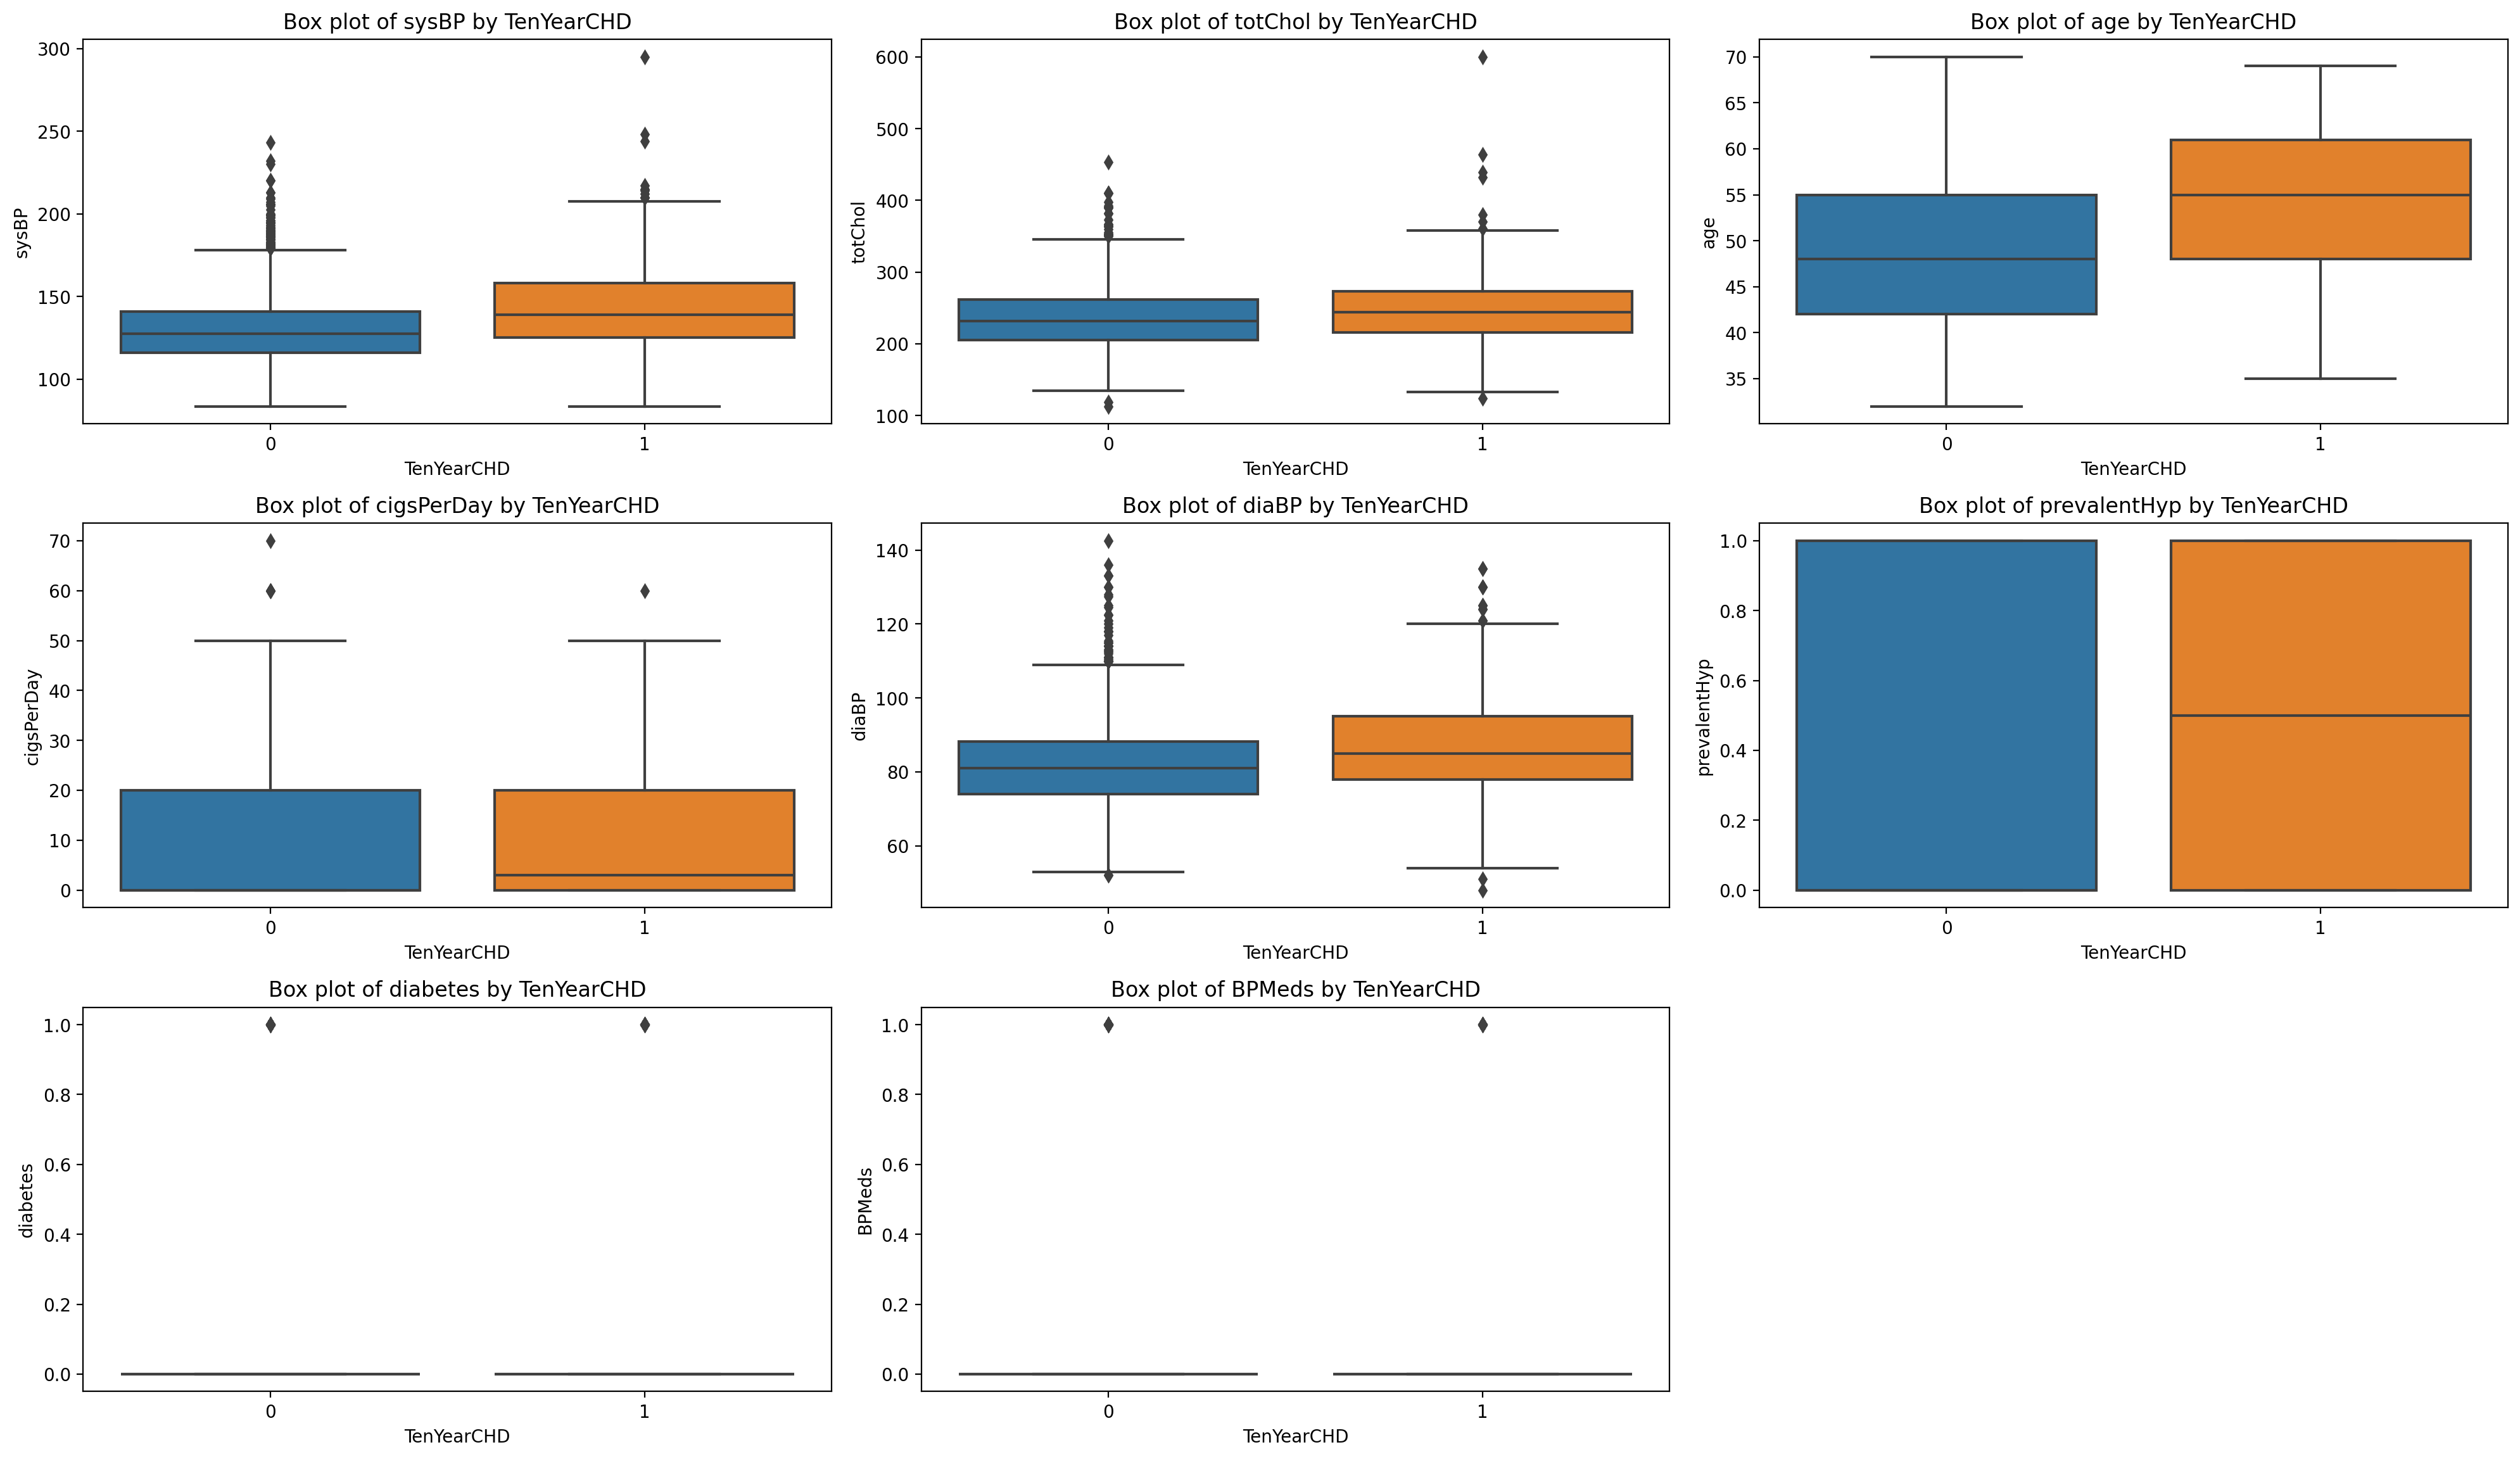

In [18]:
plt.figure(figsize=(20, 15))
for i, feature in enumerate(features_list, 1):
    plt.subplot(4, 3, i)
    sns.boxplot(data=df, x='TenYearCHD', y=feature)
    plt.title(f'Box plot of {feature} by TenYearCHD')
plt.tight_layout()
plt.show()

<Figure size 2000x1500 with 0 Axes>

<Axes: >

<Axes: xlabel='TenYearCHD', ylabel='sysBP'>

Text(0.5, 1.0, 'Violin plot of sysBP by TenYearCHD')

<Axes: >

<Axes: xlabel='TenYearCHD', ylabel='totChol'>

Text(0.5, 1.0, 'Violin plot of totChol by TenYearCHD')

<Axes: >

<Axes: xlabel='TenYearCHD', ylabel='age'>

Text(0.5, 1.0, 'Violin plot of age by TenYearCHD')

<Axes: >

<Axes: xlabel='TenYearCHD', ylabel='cigsPerDay'>

Text(0.5, 1.0, 'Violin plot of cigsPerDay by TenYearCHD')

<Axes: >

<Axes: xlabel='TenYearCHD', ylabel='diaBP'>

Text(0.5, 1.0, 'Violin plot of diaBP by TenYearCHD')

<Axes: >

<Axes: xlabel='TenYearCHD', ylabel='prevalentHyp'>

Text(0.5, 1.0, 'Violin plot of prevalentHyp by TenYearCHD')

<Axes: >

<Axes: xlabel='TenYearCHD', ylabel='diabetes'>

Text(0.5, 1.0, 'Violin plot of diabetes by TenYearCHD')

<Axes: >

<Axes: xlabel='TenYearCHD', ylabel='BPMeds'>

Text(0.5, 1.0, 'Violin plot of BPMeds by TenYearCHD')

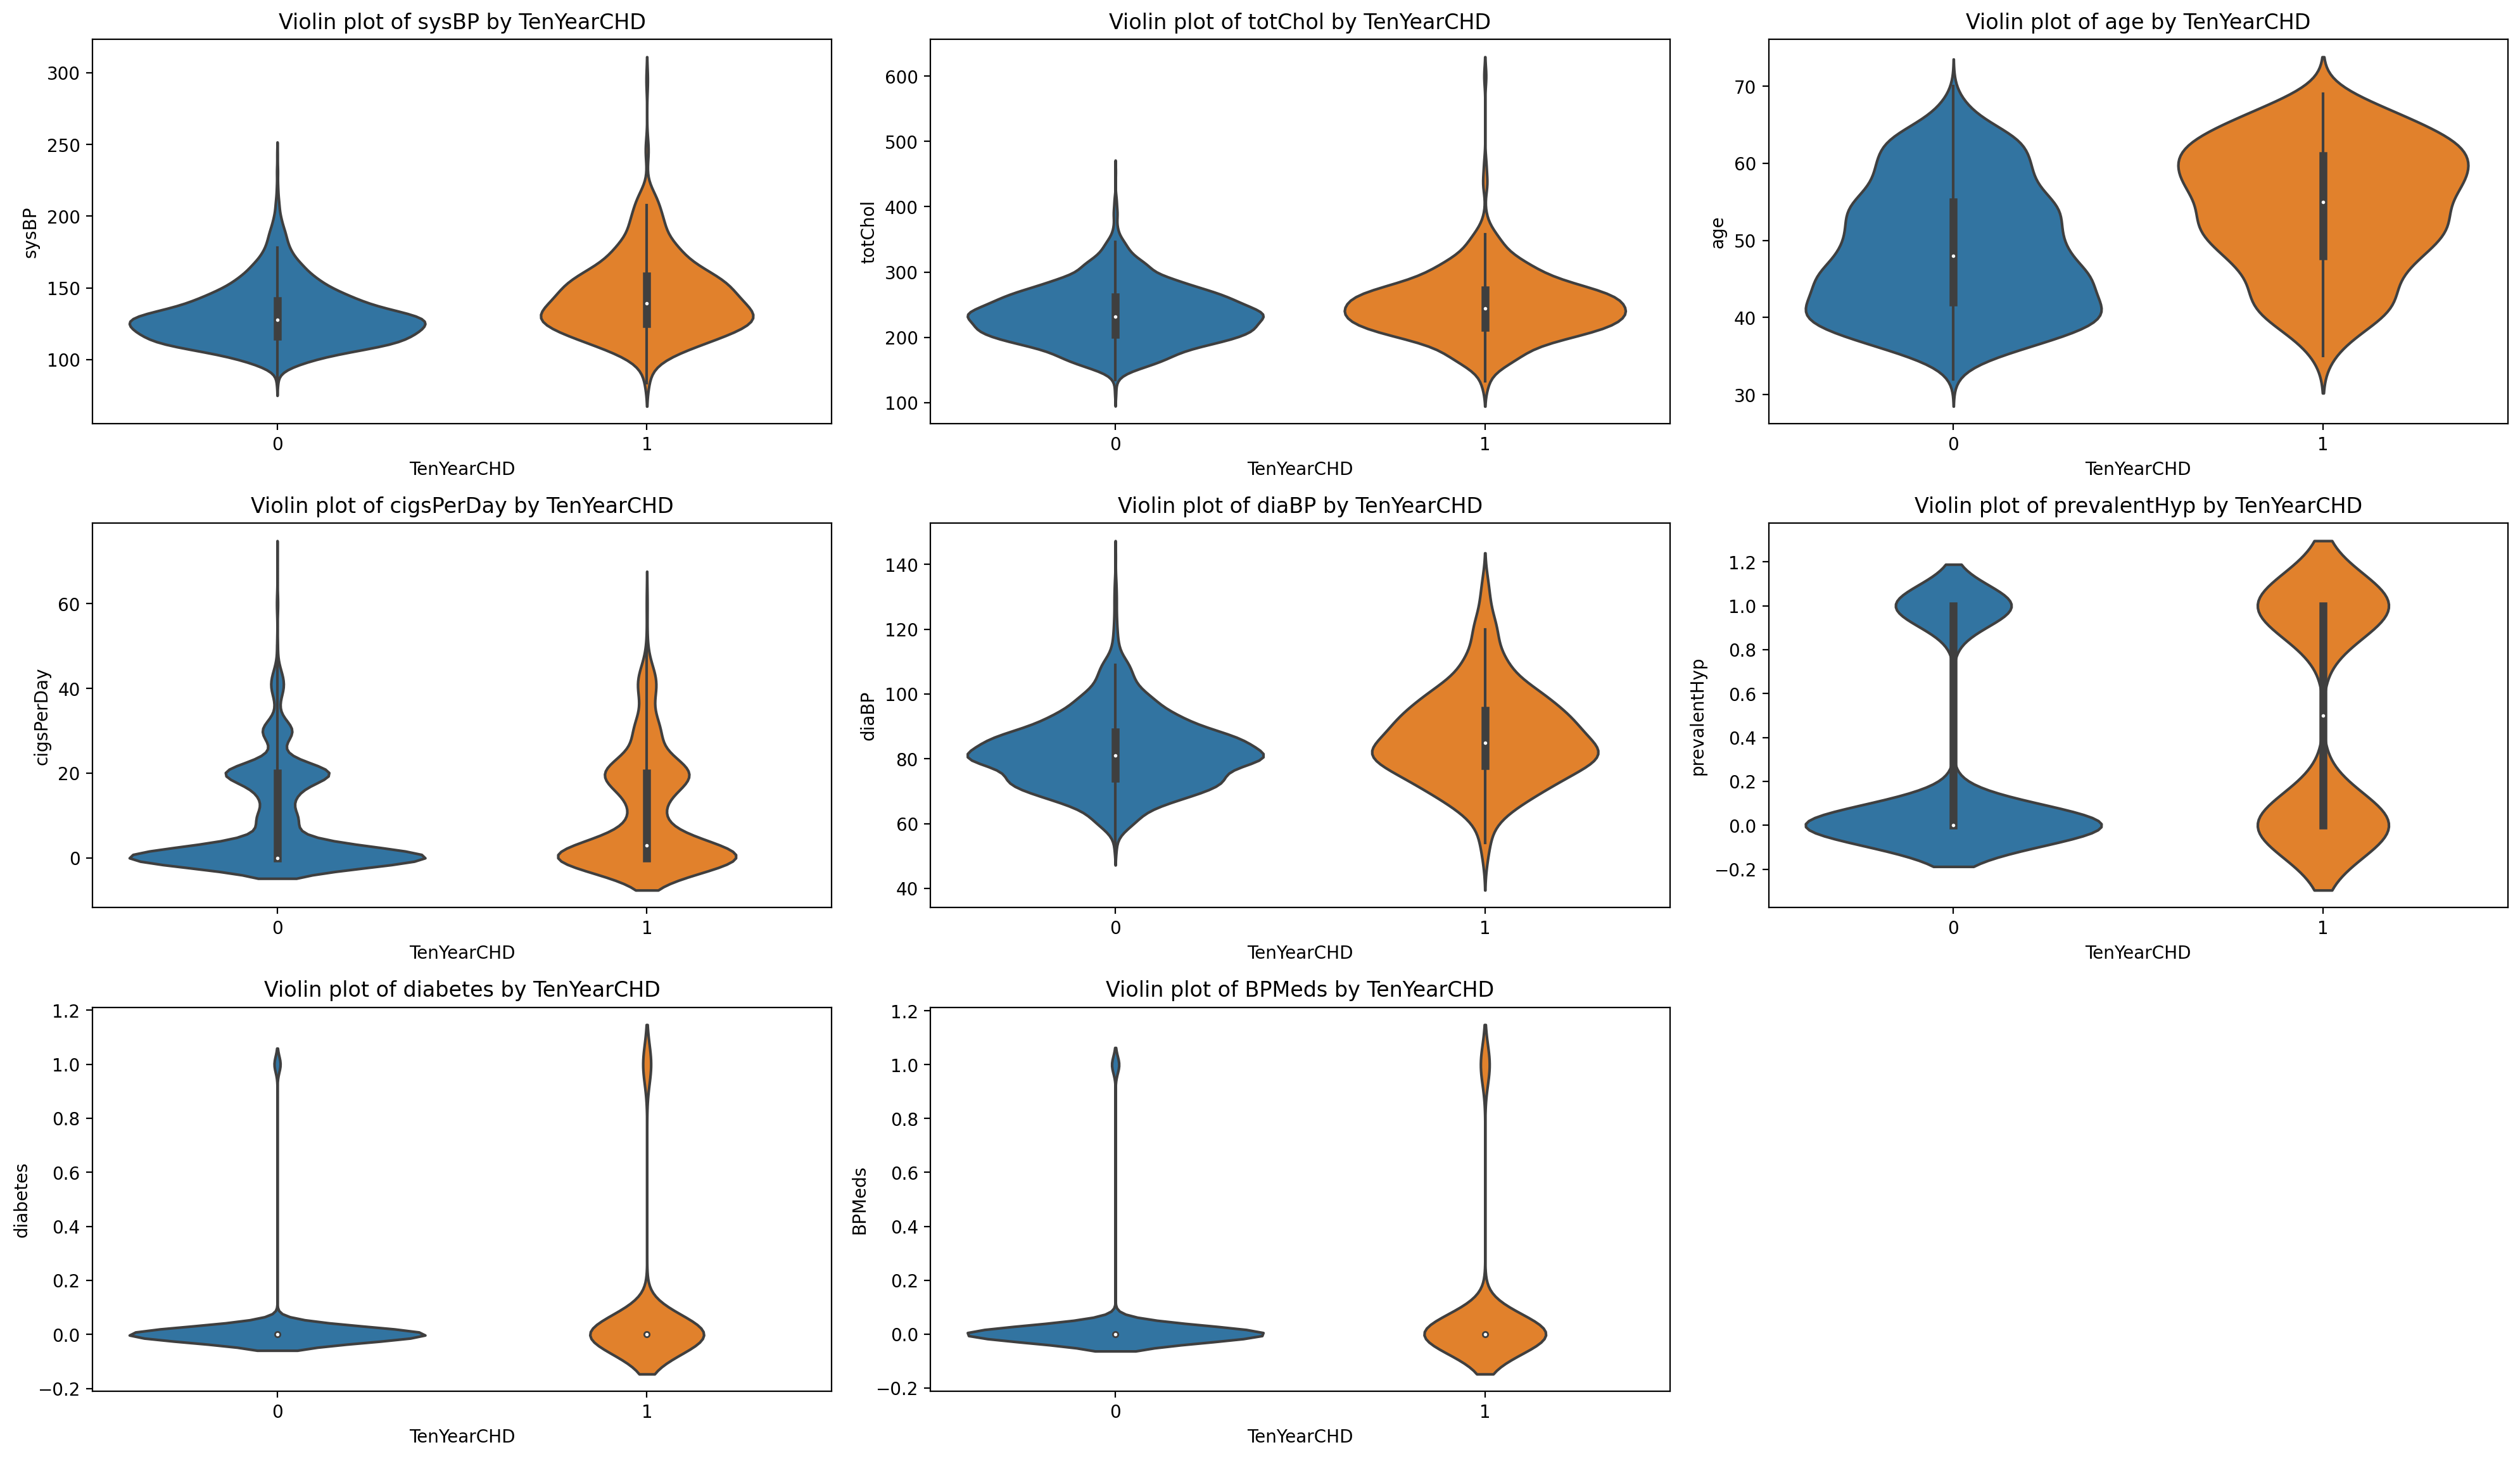

In [19]:
plt.figure(figsize=(20, 15))
for i, feature in enumerate(features_list, 1):
    plt.subplot(4, 3, i)
    sns.violinplot(data=df, x='TenYearCHD', y=feature)
    plt.title(f'Violin plot of {feature} by TenYearCHD')
plt.tight_layout()
plt.show()

C:\Users\Amritanshu Bhardwaj\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Amritanshu Bhardwaj\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Amritanshu Bhardwaj\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Amritanshu Bhardwaj\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a fu

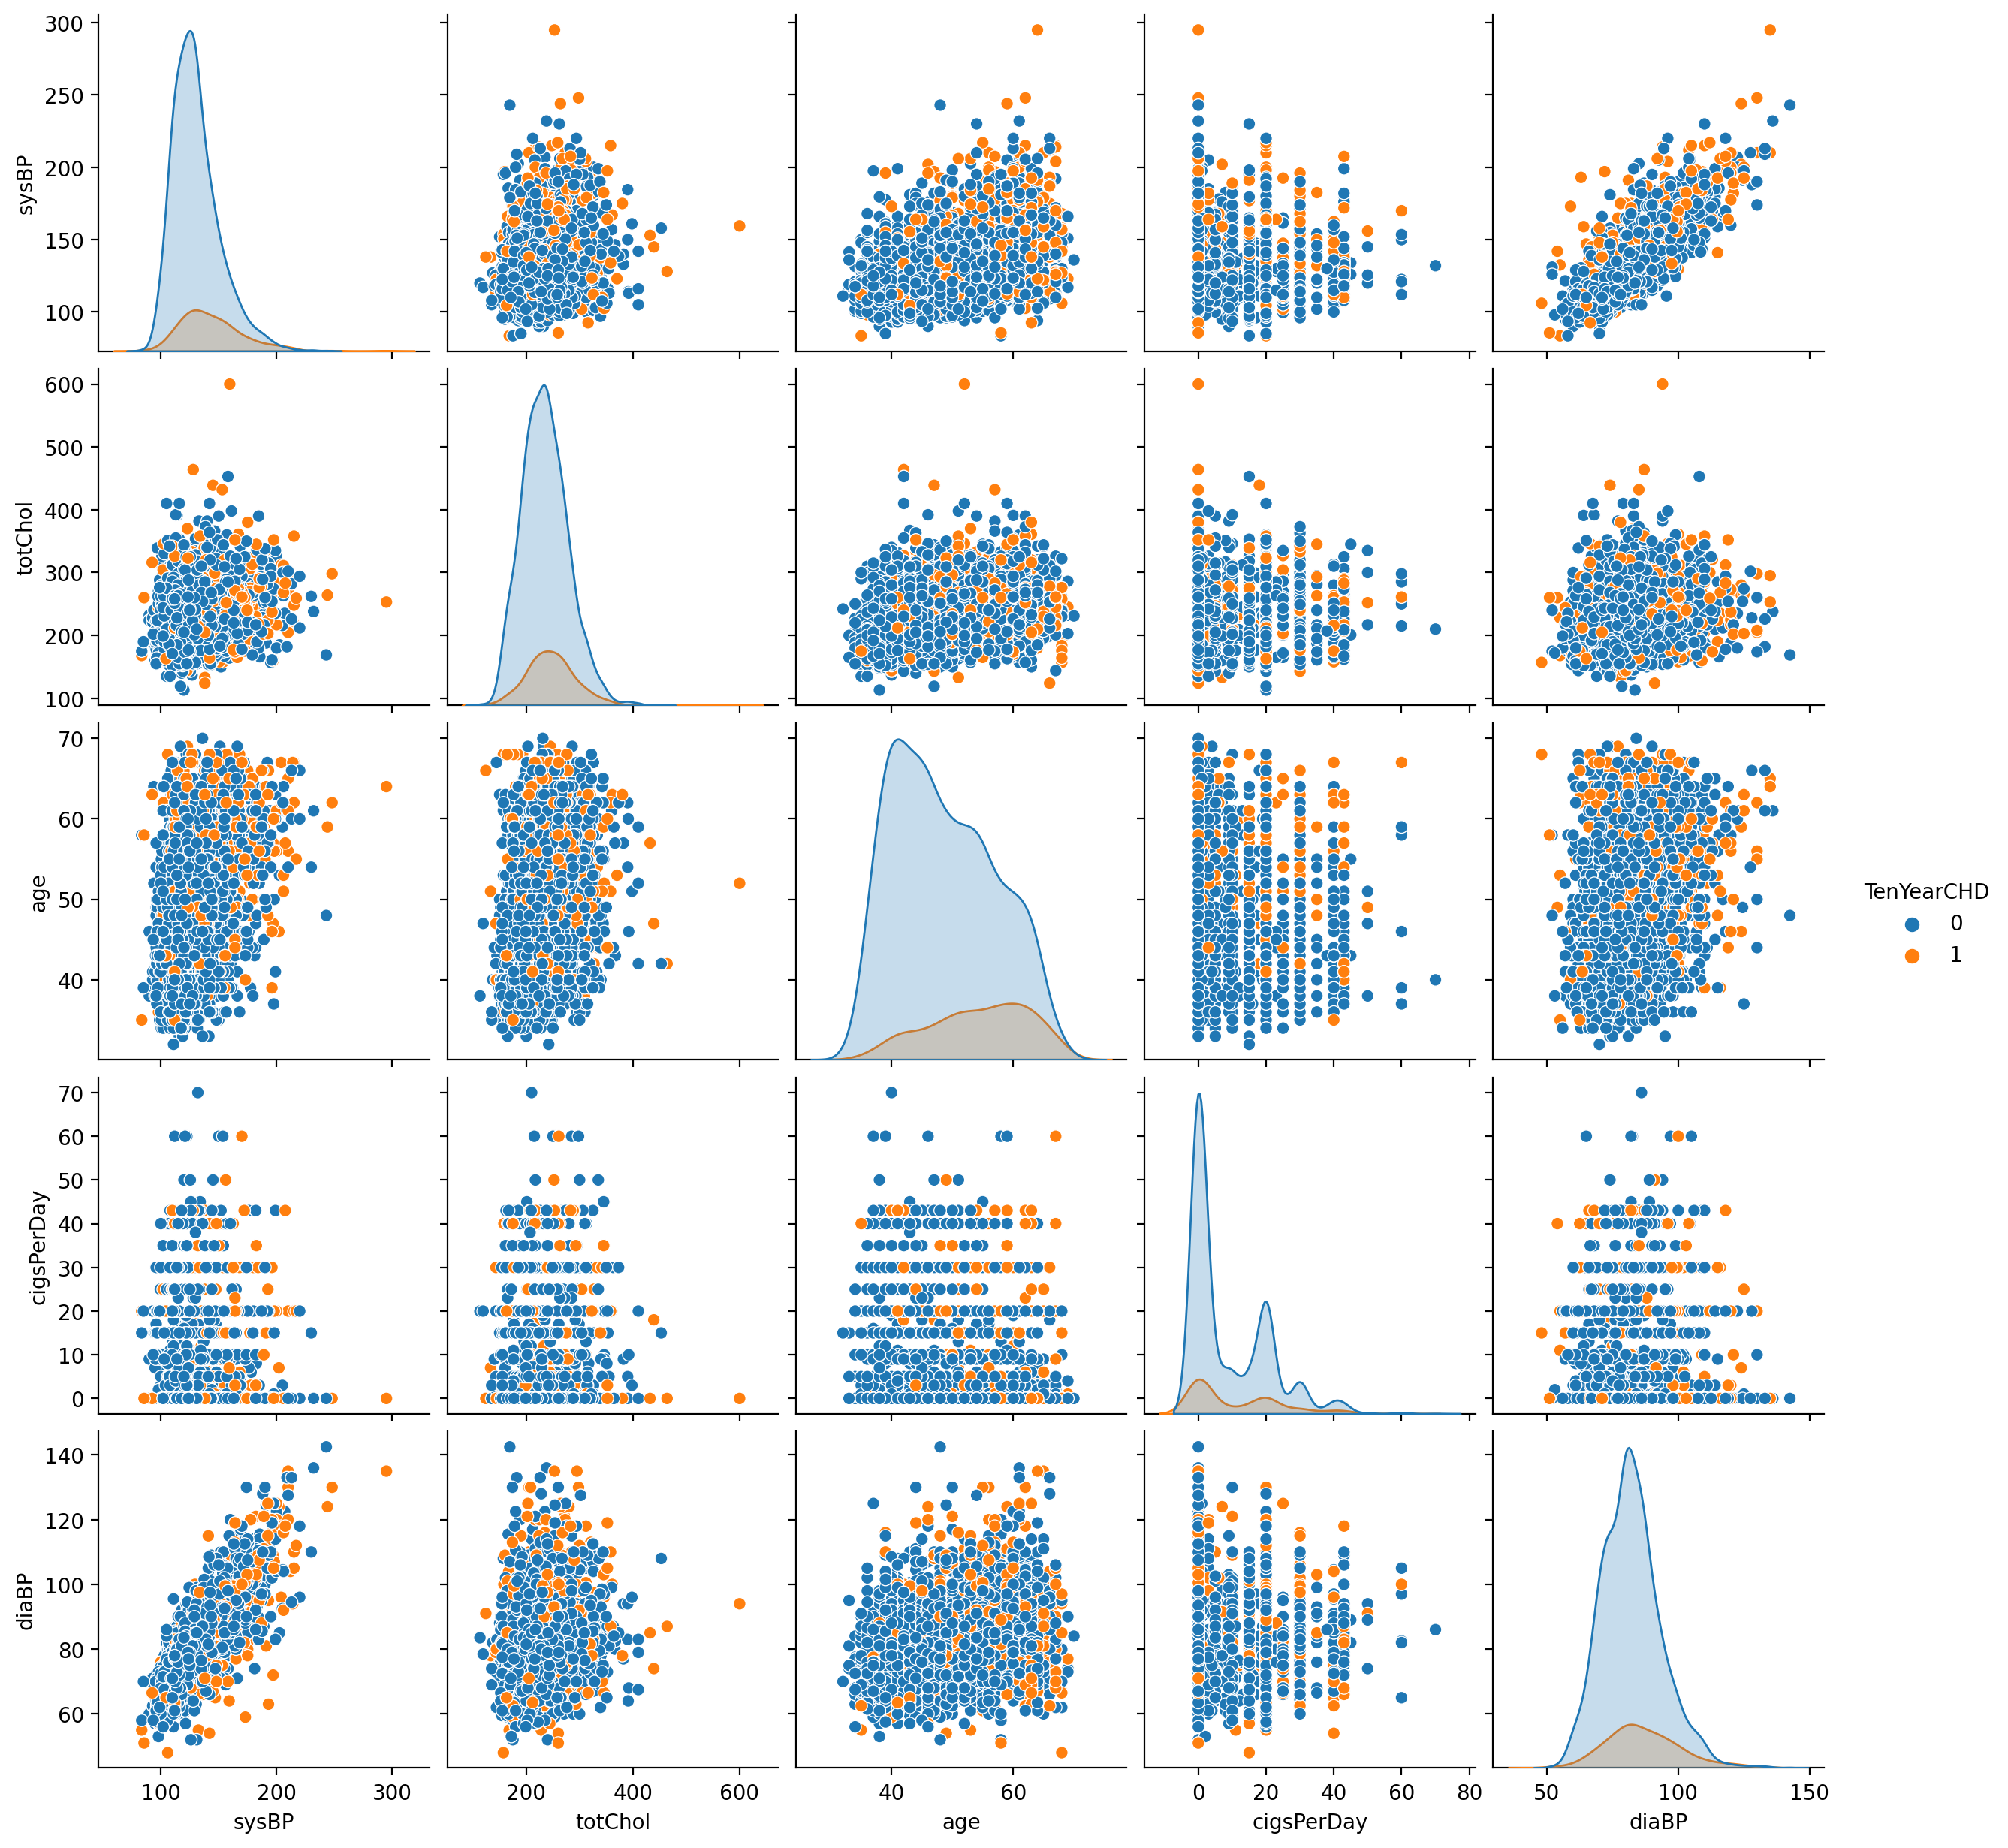

In [20]:
top_5_features = features_list[:5]
sns.pairplot(df[top_5_features + ['TenYearCHD']], diag_kind='kde', hue='TenYearCHD')
plt.show()

<Axes: xlabel='totChol'>

sysBP  age  totChol  cigsPerDay  diaBP  prevalentHyp  diabetes  BPMeds  \
423  159.5   52    600.0         0.0   94.0             1         1     0.0   

     TenYearCHD  
423           1

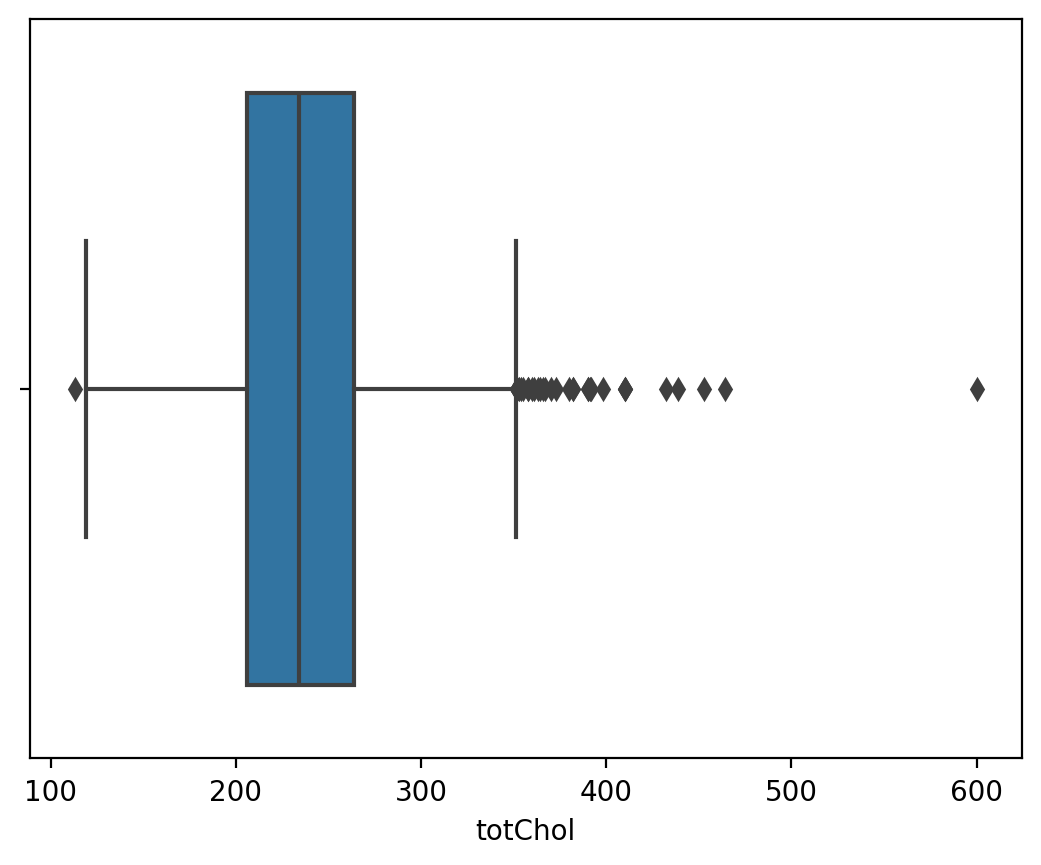

In [21]:
# Zooming into cholesterin outliers

sns.boxplot(data=df,x='totChol')
outliers = df[(df['totChol'] > 500)] 
outliers

<Axes: xlabel='totChol'>

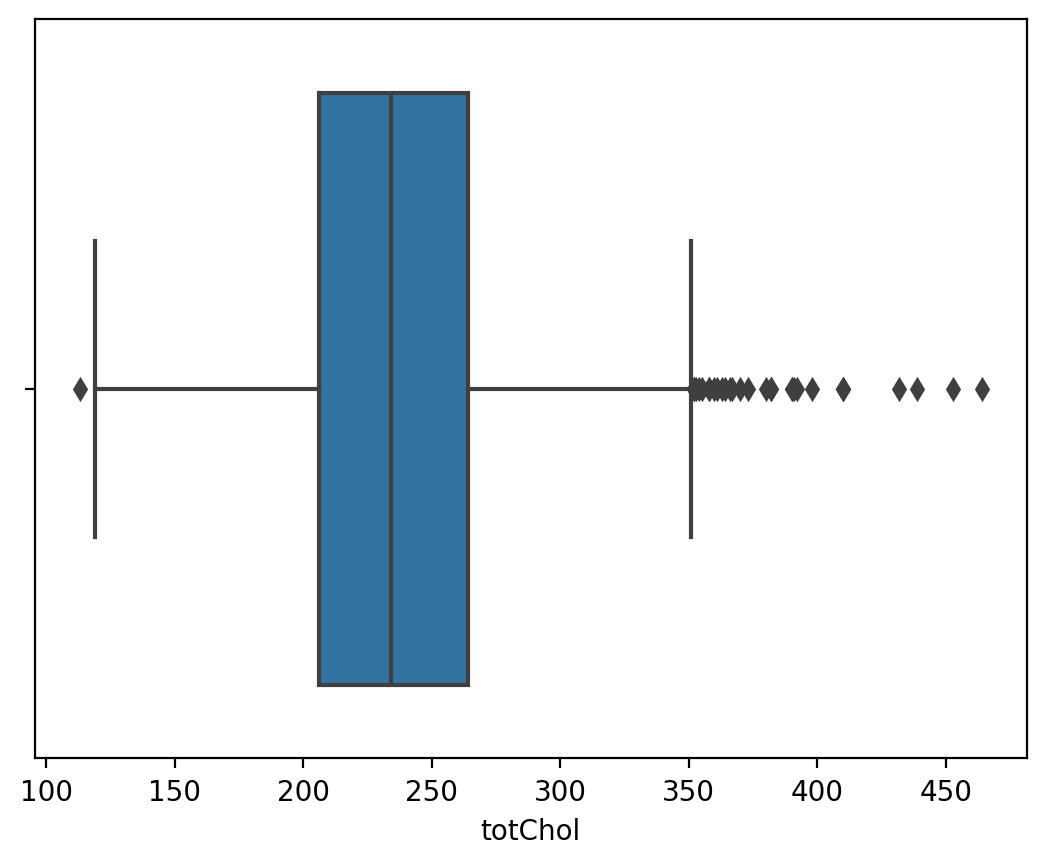

In [22]:
df = df.drop(df[df['totChol'] > 599].index)
sns.boxplot(data=df,x='totChol')

In [23]:
df_clean = df

In [24]:
#Feature scaling
scaler = MinMaxScaler(feature_range=(0,1)) 

#assign scaler to column:
df_scaled = pd.DataFrame(scaler.fit_transform(df_clean), columns=df_clean.columns)

In [25]:
df_scaled.describe()
df.describe()

sysBP          age      totChol   cigsPerDay        diaBP  \
count  2926.000000  2926.000000  2926.000000  2926.000000  2926.000000   
mean      0.232233     0.460697     0.353291     0.130227     0.369338   
std       0.105553     0.226277     0.125679     0.169766     0.127822   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.158392     0.263158     0.264957     0.000000     0.280423   
50%       0.212766     0.447368     0.344729     0.000000     0.359788   
75%       0.286052     0.631579     0.430199     0.285714     0.444444   
max       1.000000     1.000000     1.000000     1.000000     1.000000   

       prevalentHyp     diabetes       BPMeds   TenYearCHD  
count   2926.000000  2926.000000  2926.000000  2926.000000  
mean       0.314081     0.026658     0.030075     0.151401  
std        0.464228     0.161108     0.170823     0.358501  
min        0.000000     0.000000     0.000000     0.000000  
25%        0.000000     0.000000     0.000000     0.000000  
50%        0.000000     0.000000     0.000000     0.000000  
75%        1.000000     0.000000     0.000000     0.000000  
max        1.000000     1.000000     1.000000     1.000000

sysBP          age      totChol   cigsPerDay        diaBP  \
count  2926.000000  2926.000000  2926.000000  2926.000000  2926.000000   
mean    132.617225    49.506494   237.005126     9.115858    82.902427   
std      22.324482     8.598536    44.113408    11.883620    12.079196   
min      83.500000    32.000000   113.000000     0.000000    48.000000   
25%     117.000000    42.000000   206.000000     0.000000    74.500000   
50%     128.500000    49.000000   234.000000     0.000000    82.000000   
75%     144.000000    56.000000   264.000000    20.000000    90.000000   
max     295.000000    70.000000   464.000000    70.000000   142.500000   

       prevalentHyp     diabetes       BPMeds   TenYearCHD  
count   2926.000000  2926.000000  2926.000000  2926.000000  
mean       0.314081     0.026658     0.030075     0.151401  
std        0.464228     0.161108     0.170823     0.358501  
min        0.000000     0.000000     0.000000     0.000000  
25%        0.000000     0.000000     0.000000     0.000000  
50%        0.000000     0.000000     0.000000     0.000000  
75%        1.000000     0.000000     0.000000     0.000000  
max        1.000000     1.000000     1.000000     1.000000

In [26]:
#Train test split
# clarify what is y and what is x label
y = df_scaled['TenYearCHD']
X = df_scaled.drop(['TenYearCHD'], axis = 1)

# divide train test: 80 % - 20 %
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=29)

In [27]:
len(X_train)
len(X_test)

2340

586

Class 0: 2483
Class 1: 443
Proportion: 5.6 : 1


<Axes: ylabel='count'>

Text(0.5, 0, 'Heart Disease No/Yes')

Text(0, 0.5, 'Patient Count')

Text(0.5, 1.0, 'Count Outcome Heart Disease\n')

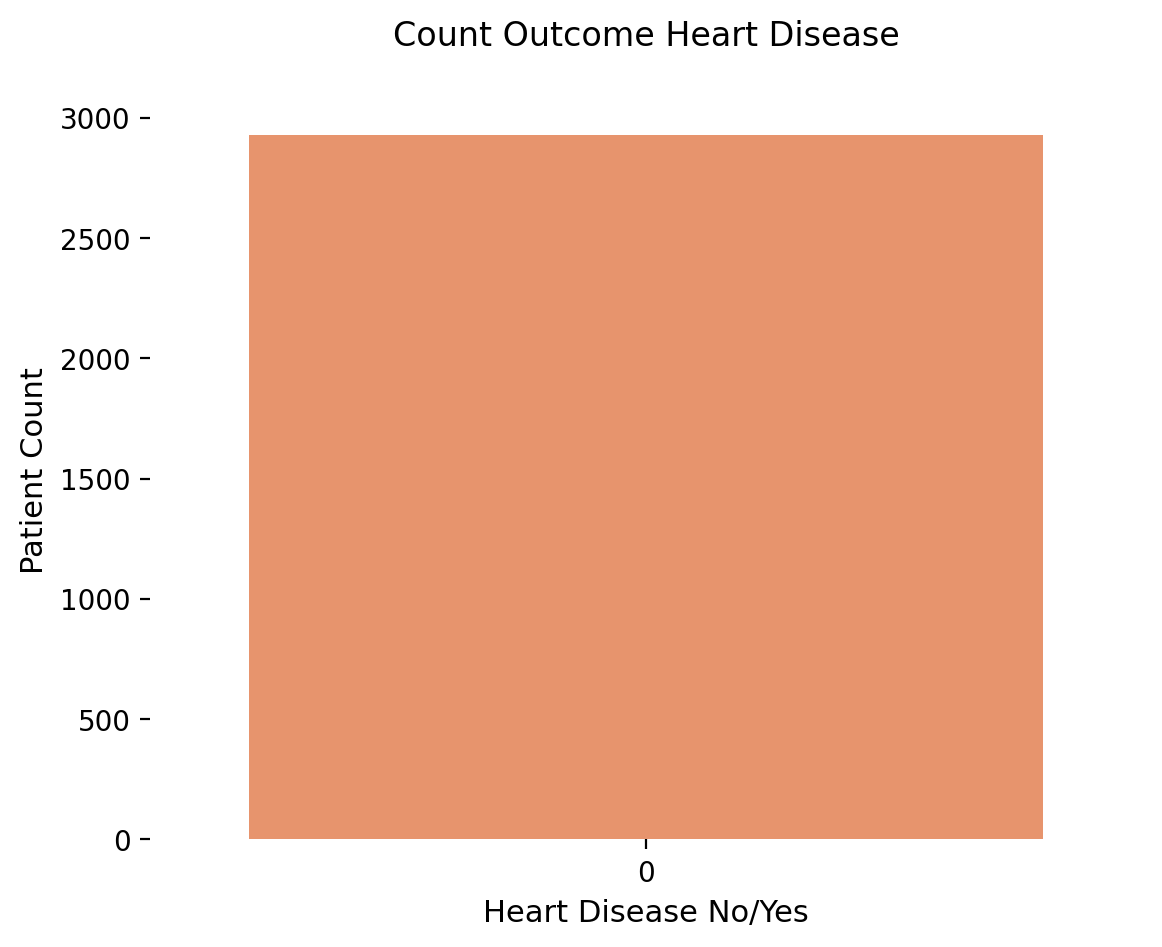

In [28]:
#Resampling imbalanced Dataset 
# Checking balance of outcome variable
target_count = df_scaled.TenYearCHD.value_counts()
print('Class 0:', target_count[0])
print('Class 1:', target_count[1])
print('Proportion:', round(target_count[0] / target_count[1], 2), ': 1')

sns.countplot(df_scaled.TenYearCHD, palette="OrRd")
plt.box(False)
plt.xlabel('Heart Disease No/Yes',fontsize=11)
plt.ylabel('Patient Count',fontsize=11)
plt.title('Count Outcome Heart Disease\n')
plt.savefig('Balance Heart Disease.png')
plt.show()

TenYearCHD
0.0    611
1.0    443
Name: count, dtype: int64

<Axes: xlabel='TenYearCHD', ylabel='count'>

Text(0.5, 0, 'Heart Disease No/Yes')

Text(0, 0.5, 'Patient Count')

Text(0.5, 1.0, 'Count Outcome Heart Disease after Resampling\n')

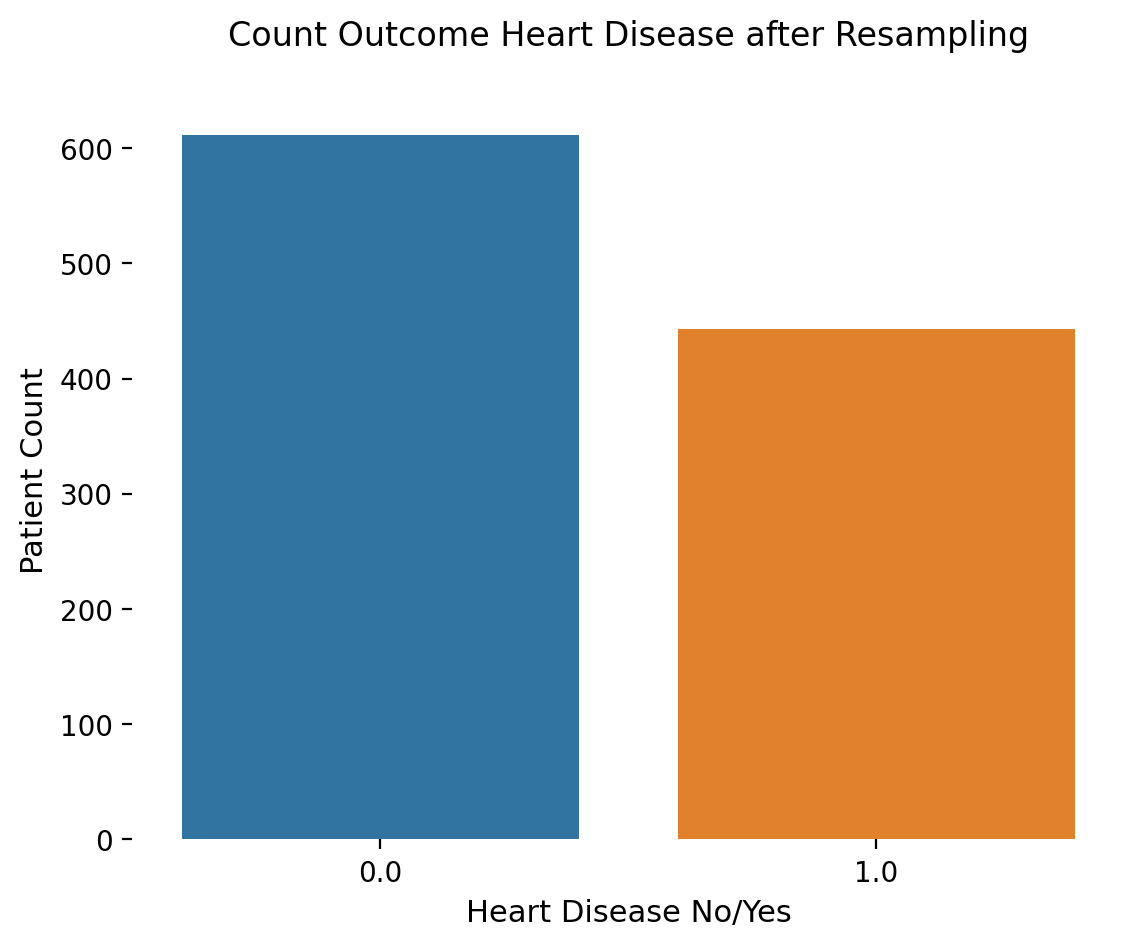

In [29]:
# Shuffle df
shuffled_df = df_scaled.sample(frac=1,random_state=4)

# Put all the fraud class in a separate dataset.
CHD_df = shuffled_df.loc[shuffled_df['TenYearCHD'] == 1]

#Randomly select 492 observations from the non-fraud (majority class)
non_CHD_df = shuffled_df.loc[shuffled_df['TenYearCHD'] == 0].sample(n=611,random_state=42)

# Concatenate both dataframes again
normalized_df = pd.concat([CHD_df, non_CHD_df])

# check new class counts
normalized_df.TenYearCHD.value_counts()

# plot new count
sns.countplot(x='TenYearCHD',data=normalized_df)
plt.box(False)
plt.xlabel('Heart Disease No/Yes',fontsize=11)
plt.ylabel('Patient Count',fontsize=11)
plt.title('Count Outcome Heart Disease after Resampling\n')
#plt.savefig('Balance Heart Disease.png')
plt.show()

In [30]:
y_train = normalized_df['TenYearCHD']
X_train = normalized_df.drop('TenYearCHD', axis=1)

from sklearn.pipeline import Pipeline

classifiers = [LogisticRegression(),SVC(),DecisionTreeClassifier(),KNeighborsClassifier(2)]

for classifier in classifiers:
    pipe = Pipeline(steps=[('classifier', classifier)])
    pipe.fit(X_train, y_train)   
    print("The accuracy score of {0} is: {1:.2f}%".format(classifier,(pipe.score(X_test, y_test)*100)))

Pipeline(steps=[('classifier', LogisticRegression())])

The accuracy score of LogisticRegression() is: 74.40%


Pipeline(steps=[('classifier', SVC())])

The accuracy score of SVC() is: 74.23%


Pipeline(steps=[('classifier', DecisionTreeClassifier())])

The accuracy score of DecisionTreeClassifier() is: 77.65%


Pipeline(steps=[('classifier', KNeighborsClassifier(n_neighbors=2))])

The accuracy score of KNeighborsClassifier(n_neighbors=2) is: 81.57%


In [31]:
# logistic regression again with the balanced dataset

normalized_df_reg = LogisticRegression().fit(X_train, y_train)

normalized_df_reg_pred = normalized_df_reg.predict(X_test)

# check accuracy: Accuracy: Overall, how often is the classifier correct? Accuracy = (True Pos + True Negative)/total
acc = accuracy_score(y_test, normalized_df_reg_pred)
print(f"The accuracy score for LogReg is: {round(acc,3)*100}%")

# f1 score: The F1 score can be interpreted as a weighted average of the precision and recall, where an F1 score reaches its best value at 1 and worst score at 0.
f1 = f1_score(y_test, normalized_df_reg_pred)
print(f"The f1 score for LogReg is: {round(f1,3)*100}%")

# Precision score: When it predicts yes, how often is it correct? Precision=True Positive/predicted yes
precision = precision_score(y_test, normalized_df_reg_pred)
print(f"The precision score for LogReg is: {round(precision,3)*100}%")

# recall score: True Positive Rate(Sensitivity or Recall): When it’s actually yes, how often does it predict yes? True Positive Rate = True Positive/actual yes
recall = recall_score(y_test, normalized_df_reg_pred)
print(f"The recall score for LogReg is: {round(recall,3)*100}%")

The accuracy score for LogReg is: 74.4%
The f1 score for LogReg is: 41.9%
The precision score for LogReg is: 34.0%
The recall score for LogReg is: 54.50000000000001%


<Axes: >

Text(0.5, 1.1, 'Confusion matrix Logistic Regression\n')

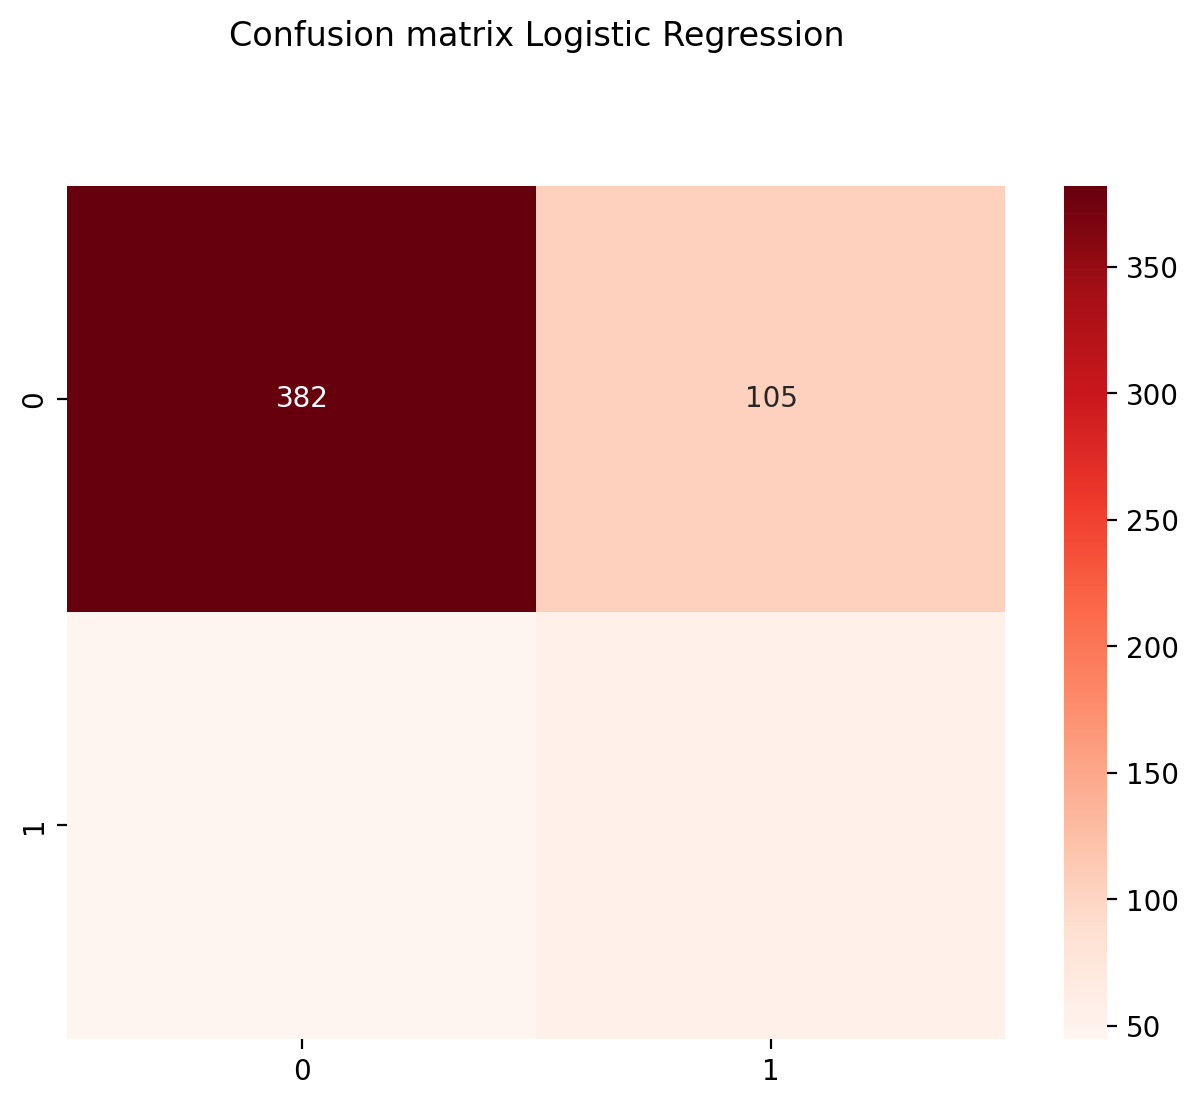

In [32]:
# plotting confusion matrix LogReg

cnf_matrix_log = confusion_matrix(y_test, normalized_df_reg_pred)

sns.heatmap(pd.DataFrame(cnf_matrix_log), annot=True,cmap="Reds" , fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix Logistic Regression\n', y=1.1)

In [33]:
# Support Vector Machine

#initialize model
svm = SVC()

#fit model
svm.fit(X_train, y_train)

normalized_df_svm_pred = svm.predict(X_test)

# check accuracy: Accuracy: Overall, how often is the classifier correct? Accuracy = (True Pos + True Negative)/total
acc = accuracy_score(y_test, normalized_df_svm_pred)
print(f"The accuracy score for SVM is: {round(acc,3)*100}%")

# f1 score: The F1 score can be interpreted as a weighted average of the precision and recall, where an F1 score reaches its best value at 1 and worst score at 0.
f1 = f1_score(y_test, normalized_df_svm_pred)
print(f"The f1 score for SVM is: {round(f1,3)*100}%")

# Precision score: When it predicts yes, how often is it correct? Precision=True Positive/predicted yes
precision = precision_score(y_test, normalized_df_svm_pred)
print(f"The precision score for SVM is: {round(precision,3)*100}%")

# recall score: True Positive Rate(Sensitivity or Recall): When it’s actually yes, how often does it predict yes? True Positive Rate = True Positive/actual yes
recall = recall_score(y_test, normalized_df_svm_pred)
print(f"The recall score for SVM is: {round(recall,3)*100}%")

SVC()

The accuracy score for SVM is: 74.2%
The f1 score for SVM is: 41.699999999999996%
The precision score for SVM is: 33.800000000000004%
The recall score for SVM is: 54.50000000000001%


<Axes: >

Text(0.5, 1.1, 'Confusion matrix SVM\n')

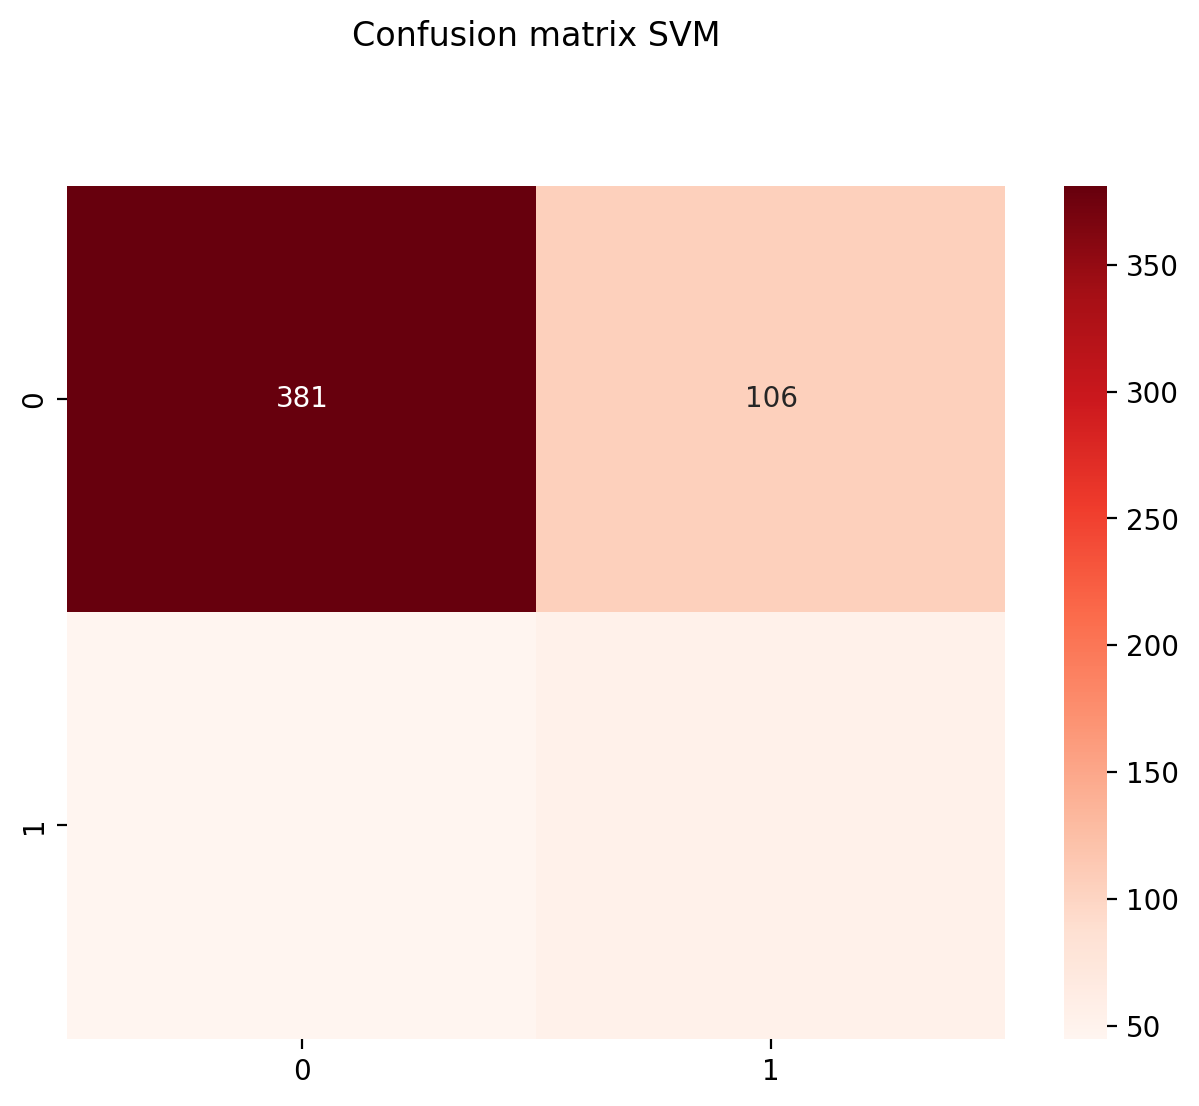

In [34]:
# plotting confusion matrix SVM

cnf_matrix_svm = confusion_matrix(y_test, normalized_df_svm_pred)

sns.heatmap(pd.DataFrame(cnf_matrix_svm), annot=True,cmap="Reds" , fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix SVM\n', y=1.1)

In [35]:
# Decision Tree

#initialize model
dtc_up = DecisionTreeClassifier()

# fit model
dtc_up.fit(X_train, y_train)

normalized_df_dtc_pred = dtc_up.predict(X_test)

# check accuracy: Accuracy: Overall, how often is the classifier correct? Accuracy = (True Pos + True Negative)/total
acc = accuracy_score(y_test, normalized_df_dtc_pred)
print(f"The accuracy score for DTC is: {round(acc,3)*100}%")

# f1 score: The F1 score can be interpreted as a weighted average of the precision and recall, where an F1 score reaches its best value at 1 and worst score at 0.
f1 = f1_score(y_test, normalized_df_dtc_pred)
print(f"The f1 score for DTC is: {round(f1,3)*100}%")

# Precision score: When it predicts yes, how often is it correct? Precision=True Positive/predicted yes
precision = precision_score(y_test, normalized_df_dtc_pred)
print(f"The precision score for DTC is: {round(precision,3)*100}%")

# recall score: True Positive Rate(Sensitivity or Recall): When it’s actually yes, how often does it predict yes? True Positive Rate = True Positive/actual yes
recall = recall_score(y_test, normalized_df_dtc_pred)
print(f"The recall score for DTC is: {round(recall,3)*100}%")

DecisionTreeClassifier()

The accuracy score for DTC is: 78.2%
The f1 score for DTC is: 60.699999999999996%
The precision score for DTC is: 43.6%
The recall score for DTC is: 100.0%


<Axes: >

Text(0.5, 1.1, 'Confusion matrix Decision Tree\n')

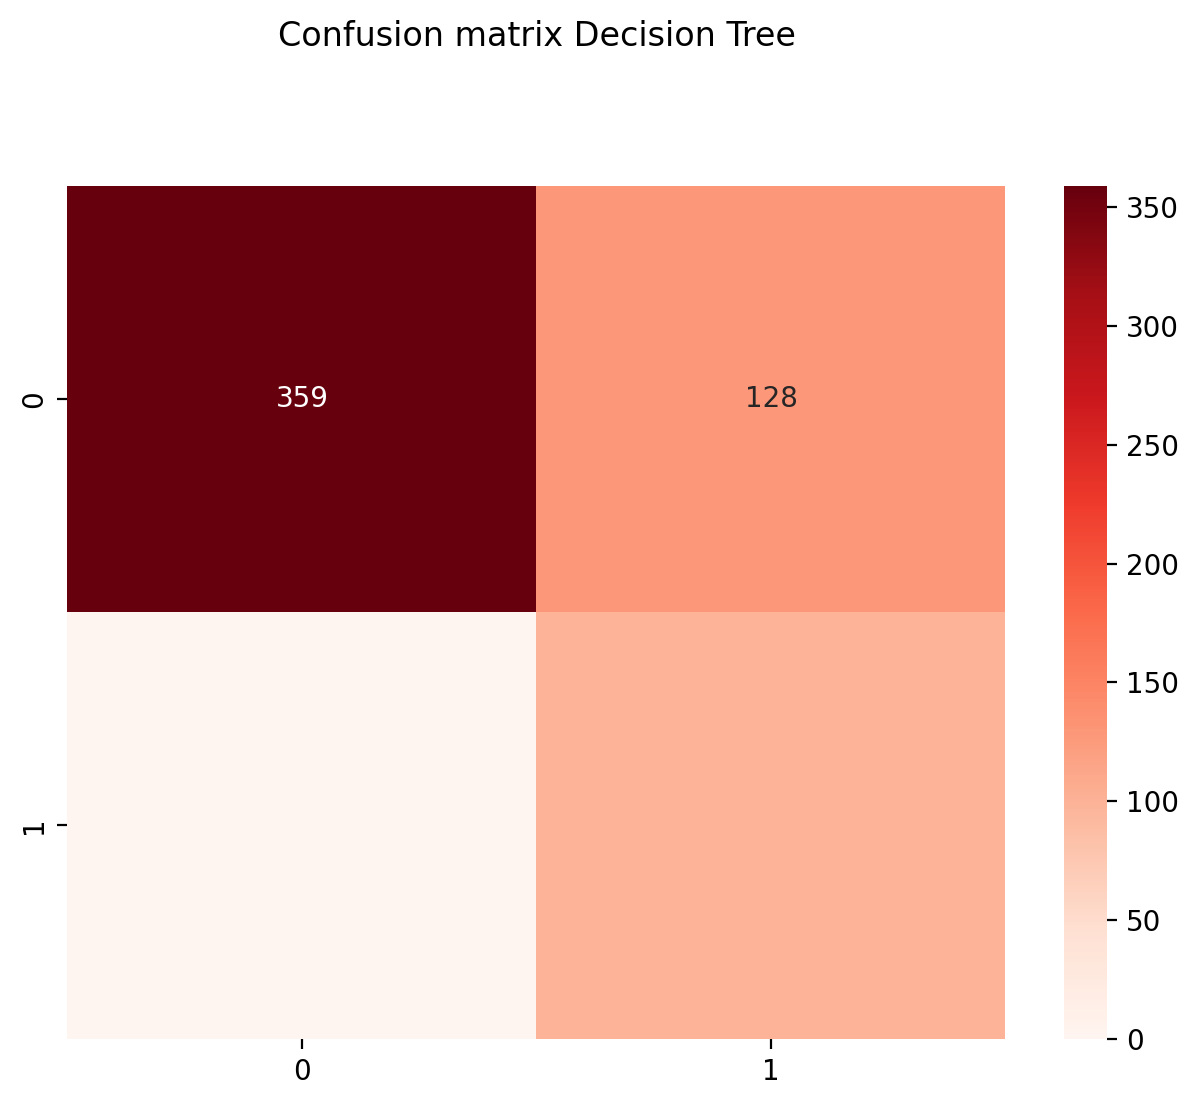

In [36]:
# plotting confusion matrix Decision Tree

cnf_matrix_dtc = confusion_matrix(y_test, normalized_df_dtc_pred)

sns.heatmap(pd.DataFrame(cnf_matrix_dtc), annot=True,cmap="Reds" , fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix Decision Tree\n', y=1.1)

In [62]:
# KNN Model
knn = KNeighborsClassifier(n_neighbors = 2)

#fit model
knn.fit(X_train, y_train)

# prediction = knn.predict(x_test)
normalized_df_knn_pred = knn.predict(X_test)


# check accuracy: Accuracy: Overall, how often is the classifier correct? Accuracy = (True Pos + True Negative)/total
acc = accuracy_score(y_test, normalized_df_knn_pred)
print(f"The accuracy score for KNN is: {round(acc,3)*100}%")

# f1 score: The F1 score can be interpreted as a weighted average of the precision and recall, where an F1 score reaches its best value at 1 and worst score at 0.
f1 = f1_score(y_test, normalized_df_knn_pred)
print(f"The f1 score for KNN is: {round(f1,3)*100}%")

# Precision score: When it predicts yes, how often is it correct? Precision=True Positive/predicted yes
precision = precision_score(y_test, normalized_df_knn_pred)
print(f"The precision score for KNN is: {round(precision,3)*100}%")

# recall score: True Positive Rate(Sensitivity or Recall): When it’s actually yes, how often does it predict yes? True Positive Rate = True Positive/actual yes
recall = recall_score(y_test, normalized_df_knn_pred)
print(f"The recall score for KNN is: {round(recall,3)*100}%")



KNeighborsClassifier(n_neighbors=2)

The accuracy score for KNN is: 82.1%
The f1 score for KNN is: 7.1%
The precision score for KNN is: 28.599999999999998%
The recall score for KNN is: 4.0%


In [63]:
#Result: The KNN model has the highest accuracy score

In [64]:
# Check overfit of the KNN model
# accuracy test and train
acc_test = knn.score(X_test, y_test)
print("The accuracy score of the test data is: ",acc_test*100,"%")
acc_train = knn.score(X_train, y_train)
print("The accuracy score of the training data is: ",round(acc_train*100,2),"%")

The accuracy score of the test data is:  82.08191126279864 %
The accuracy score of the training data is:  88.33 %


In [65]:
# Perform cross validation
'''Cross Validation is used to assess the predictive performance of the models and and to judge 
how they perform outside the sample to a new data set'''

cv_results = cross_val_score(knn, X, y, cv=5) 

print ("Cross-validated scores:", cv_results)
print("The Accuracy of Model with Cross Validation is: {0:.2f}%".format(cv_results.mean() * 100))

'Cross Validation is used to assess the predictive performance of the models and and to judge \nhow they perform outside the sample to a new data set'

Cross-validated scores: [0.83788396 0.83247863 0.84444444 0.83418803 0.84102564]
The Accuracy of Model with Cross Validation is: 83.80%


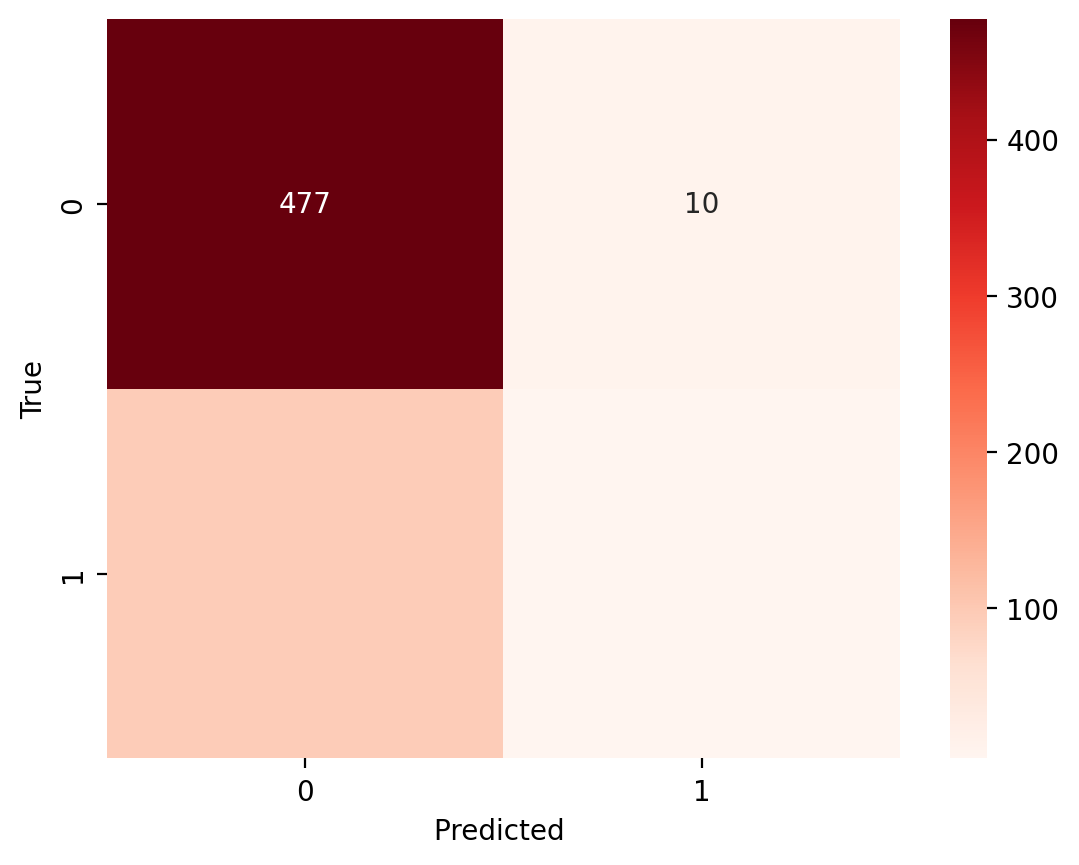

In [66]:
cnf_matrix_knn = confusion_matrix(y_test, normalized_df_knn_pred)

ax= plt.subplot()
sns.heatmap(pd.DataFrame(cnf_matrix_knn), annot=True,cmap="Reds" , fmt='g')

ax.set_xlabel('Predicted ');ax.set_ylabel('True'); 

"the AUC ROC Curve is a measure of performance based on plotting the true positive and false positive rate \nand calculating the area under that curve.The closer the score to 1 the better the algorithm's ability to \ndistinguish between the two outcome classes."

Text(0.5, 1.0, 'ROC CURVE KNN')

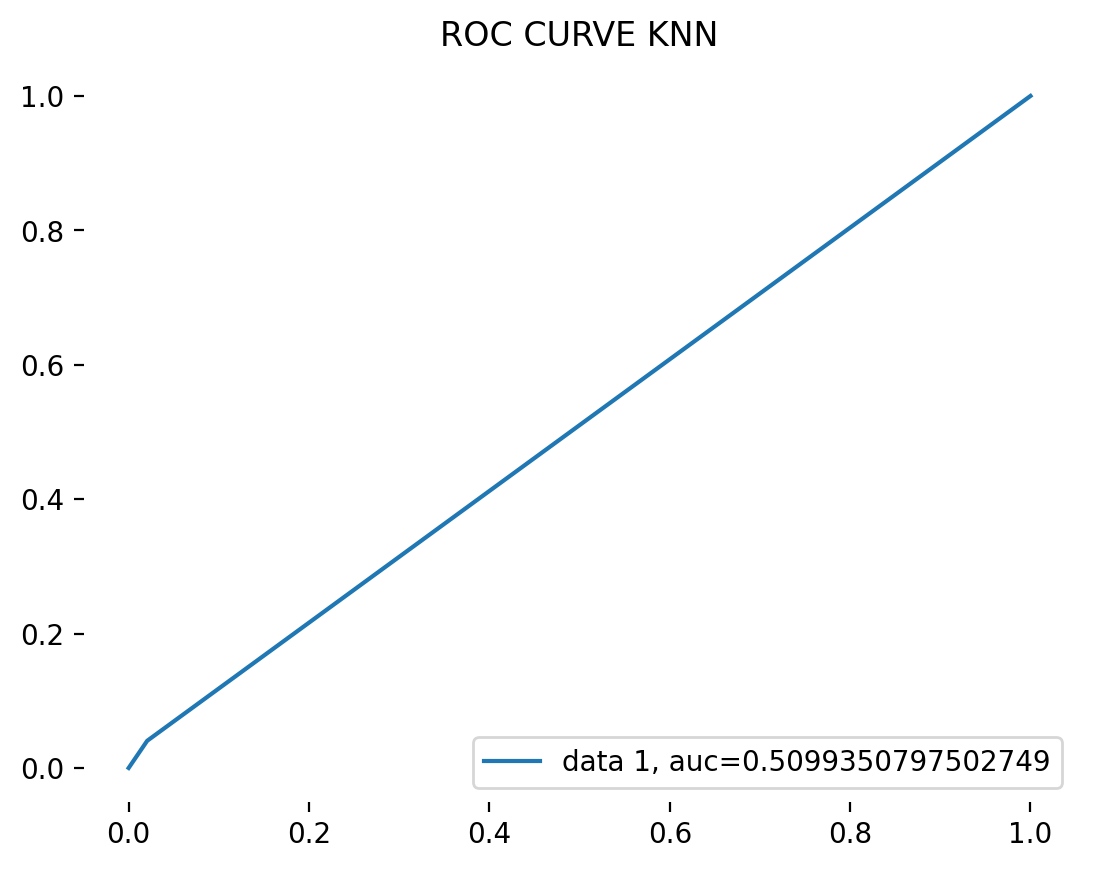

The score for the AUC ROC Curve is: 51.0%


In [67]:
# AU ROC CURVE KNN
'''the AUC ROC Curve is a measure of performance based on plotting the true positive and false positive rate 
and calculating the area under that curve.The closer the score to 1 the better the algorithm's ability to 
distinguish between the two outcome classes.'''

fpr, tpr, _ = roc_curve(y_test, normalized_df_knn_pred)
auc = roc_auc_score(y_test, normalized_df_knn_pred)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.box(False)
plt.title ('ROC CURVE KNN')
plt.show()

print(f"The score for the AUC ROC Curve is: {round(auc,3)*100}%")

Text(0.5, 1.0, 'ROC CURVE Decision Tree')

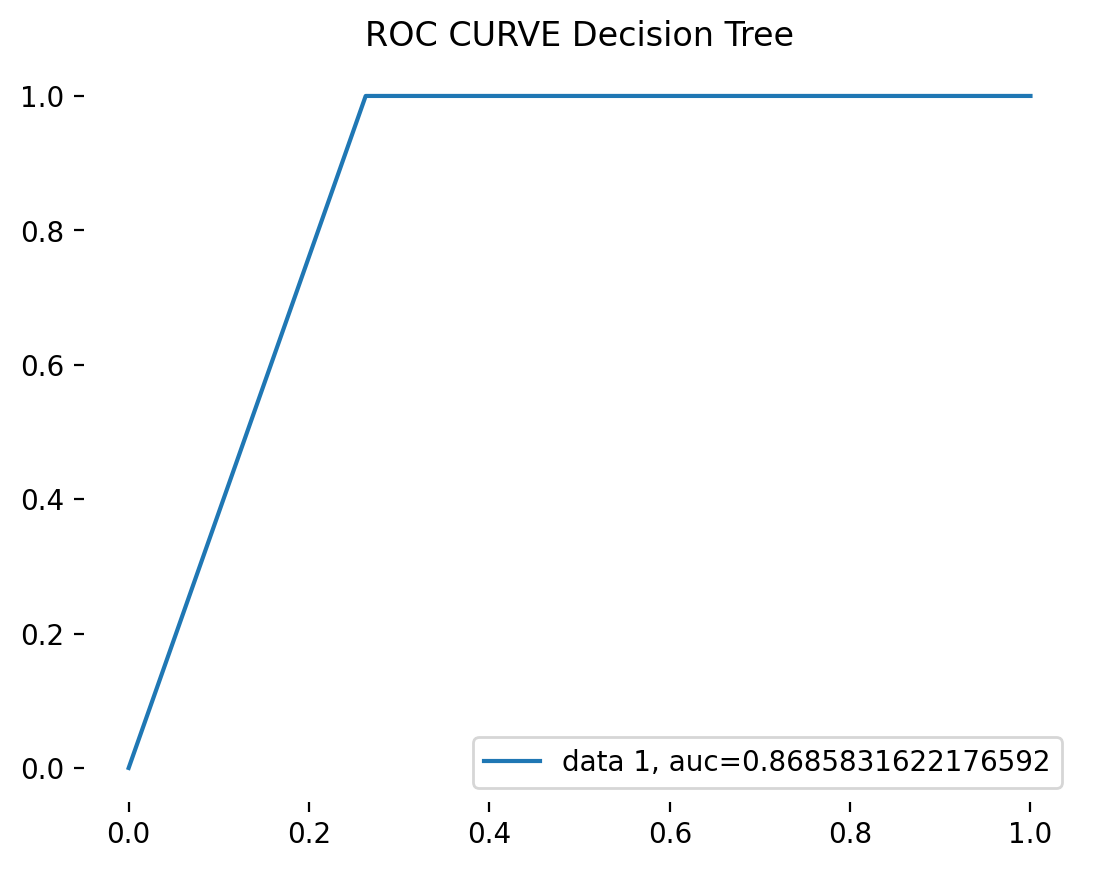

In [68]:
fpr, tpr, _ = roc_curve(y_test, normalized_df_dtc_pred)
auc = roc_auc_score(y_test, normalized_df_dtc_pred)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.box(False)
plt.title ('ROC CURVE Decision Tree')
plt.show()

<Axes: xlabel='totChol'>

Empty DataFrame
Columns: [sysBP, age, totChol, cigsPerDay, diaBP, prevalentHyp, diabetes, BPMeds, TenYearCHD]
Index: []


<Axes: xlabel='totChol'>

             sysBP          age      totChol   cigsPerDay        diaBP  \
count  1054.000000  1054.000000  1054.000000  1054.000000  1054.000000   
mean      0.249784     0.501898     0.353202     0.150364     0.413527   
std       0.117659     0.248963     0.130887     0.198448     0.149479   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.167849     0.277778     0.263768     0.000000     0.312500   
50%       0.225768     0.500000     0.344928     0.000000     0.397727   
75%       0.309693     0.722222     0.428986     0.333333     0.500000   
max       1.000000     1.000000     1.000000     1.000000     1.000000   

       prevalentHyp     diabetes       BPMeds   TenYearCHD  
count   1054.000000  1054.000000  1054.000000  1054.000000  
mean       0.380455     0.037002     0.038899     0.420304  
std        0.485729     0.188856     0.193447     0.493842  
min        0.000000     0.000000     0.000000     0.000000  
25%        0.000000     0.00

KNeighborsClassifier(n_neighbors=2)

The accuracy score for KNN is: 59.199999999999996%
The F1 score for KNN is: 33.800000000000004%
The precision score for KNN is: 53.7%
The recall score for KNN is: 24.7%


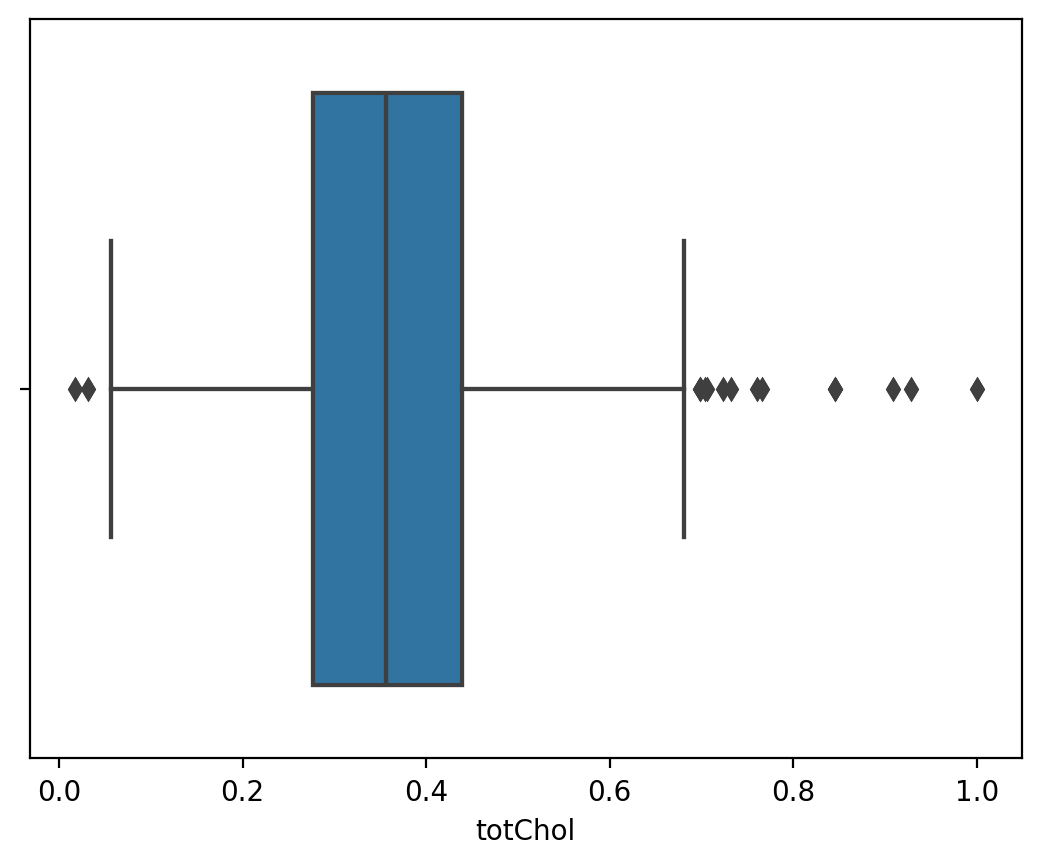

In [72]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
import seaborn as sns

# Assume df is your dataframe

# Plot initial boxplot for totChol
sns.boxplot(data=normalized_df, x='totChol')

# Identify outliers
outliers = normalized_df[(normalized_df['totChol'] > 500)]
print(outliers)

# Remove outliers
normalized_df = normalized_df.drop(normalized_df[normalized_df['totChol'] > 599].index)

# Plot boxplot again after removing outliers
sns.boxplot(data=normalized_df, x='totChol')

# Save clean data
df_clean = normalized_df

# Feature scaling
scaler = MinMaxScaler(feature_range=(0,1))

# Assign scaler to columns
df_scaled = pd.DataFrame(scaler.fit_transform(df_clean), columns=df_clean.columns)
print(df_scaled.describe())

# Print original dataframe description
print(df.describe())

# Define features and target
y = df_scaled['TenYearCHD']
X = df_scaled.drop(['TenYearCHD'], axis=1)

# Split data into training and testing sets (80% - 20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=29)

# Initialize and train KNN classifier
knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(X_train, y_train)

# Predict using the test set
normalized_df_knn_pred = knn.predict(X_test)

# Calculate and print accuracy
acc = accuracy_score(y_test, normalized_df_knn_pred)
print(f"The accuracy score for KNN is: {round(acc, 3) * 100}%")

# Calculate and print F1 score
f1 = f1_score(y_test, normalized_df_knn_pred)
print(f"The F1 score for KNN is: {round(f1, 3) * 100}%")

# Calculate and print precision
precision = precision_score(y_test, normalized_df_knn_pred)
print(f"The precision score for KNN is: {round(precision, 3) * 100}%")

# Calculate and print recall
recall = recall_score(y_test, normalized_df_knn_pred)
print(f"The recall score for KNN is: {round(recall, 3) * 100}%")


In [75]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

def start_questionnaire():
    # Define the exact feature names as used during model training
    parameters = ['sysBP', 'age', 'totChol', 'cigsPerDay', 'diaBP', 'prevalentHyp', 'diabetes', 'BPMeds']
    
    print('Input Patient Information:')
    
    # Collect the necessary inputs
    sysBP = input("Patient's systolic blood pressure: >>> ")
    age = input("Patient's age: >>> ")
    totChol = input("Patient's cholesterol level: >>> ")
    cigsPerDay = input("Patient's smoked cigarettes per day: >>> ")
    diaBP = input("Patient's diastolic blood pressure: >>> ")
    prevalentHyp = input("Was Patient hypertensive? Yes=1, No=0 >>> ")
    diabetes = input("Did Patient have diabetes? Yes=1, No=0 >>> ")
    BPMeds = input("Has Patient been on Blood Pressure Medication? Yes=1, No=0 >>> ")
    
    # Prepare the data
    my_predictors = [
        float(sysBP), float(age), float(totChol), int(cigsPerDay), 
        float(diaBP), int(prevalentHyp), int(diabetes), int(BPMeds)
    ]
    
    my_data = dict(zip(parameters, my_predictors))
    my_df = pd.DataFrame(my_data, index=[0])
    
    # Feature scaling
    scaler = MinMaxScaler(feature_range=(0, 1))
    my_df_scaled = pd.DataFrame(scaler.fit_transform(my_df), columns=my_df.columns)
    
    # Ensure knn model and scaler are already defined and trained
    try:
        my_y_pred = knn.predict(my_df_scaled)
        print('\nResult:')
        if my_y_pred[0] == 1:
            print("The patient will develop a Heart Disease.")
        else:
            print("The patient will not develop a Heart Disease.")
    except NameError:
        print("Error: KNN model (knn) is not defined. Please ensure the model is trained and available.")
    except Exception as e:
        print(f"An error occurred: {e}")

# Uncomment the line below to test the function if the model `knn` is defined
start_questionnaire()




Input Patient Information:


Patient's systolic blood pressure: >>>  129
Patient's age: >>>  34
Patient's cholesterol level: >>>  89
Patient's smoked cigarettes per day: >>>  2
Patient's diastolic blood pressure: >>>  89
Was Patient hypertensive? Yes=1, No=0 >>>  1
Did Patient have diabetes? Yes=1, No=0 >>>  0
Has Patient been on Blood Pressure Medication? Yes=1, No=0 >>>  0



Result:
The patient will not develop a Heart Disease.


### 